In [3]:
import zipfile
%matplotlib inline
import numpy as np
import ast
import json
import urllib
import urllib2
from cStringIO import StringIO
import pandas as pd
import requests
import os
import geopandas as gpd
import matplotlib.pylab as pl
from fiona.crs import from_epsg
import fiona
import matplotlib.pylab as pl
from matplotlib import colors
import shapely
import seaborn as sns
from sklearn.cluster import KMeans
#add necessary libraries
#import networkx as nx #library supporting networks

In [4]:
fileUrl = 'https://data.cityofnewyork.us/api/geospatial/arq3-7z49?method=export&format=GeoJSON'
filebuffer = urllib.urlretrieve(fileUrl, filename='Data/Subway Stations.geojson')
fname = 'Subway Stations.geojson'
print (fname)
subStations = gpd.GeoDataFrame.from_file('Data/Subway Stations.geojson')

subStations.crs = from_epsg(4326)

Subway Stations.geojson


In [5]:
subStations.head()

geometry           line  \
0  POINT (-73.99106999861966 40.73005400028978)  4-6-6 Express   
1  POINT (-74.00019299927328 40.71880300107709)  4-6-6 Express   
2  POINT (-73.98384899986625 40.76172799961419)            1-2   
3  POINT (-73.97499915116808 40.68086213682956)          2-3-4   
4  POINT (-73.89488591154061 40.66471445143568)            3-4   

               name                                              notes  \
0          Astor Pl  4 nights, 6-all times, 6 Express-weekdays AM s...   
1          Canal St  4 nights, 6-all times, 6 Express-weekdays AM s...   
2           50th St                              1-all times, 2-nights   
3         Bergen St           4-nights, 3-all other times, 2-all times   
4  Pennsylvania Ave                        4-nights, 3-all other times   

  objectid                                url  
0        1  http://web.mta.info/nyct/service/  
1        2  http://web.mta.info/nyct/service/  
2        3  http://web.mta.info/nyct/service/  
3        4  http://web.mta.info/nyct/service/  
4        5  http://web.mta.info/nyct/service/

In [6]:
subStations.loc[subStations.name.duplicated(False)==True].name = subStations.loc[subStations.name.duplicated(False)==True].name + subStations.loc[subStations.name.duplicated(False)==True].line

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [7]:
print len(subStations.loc[subStations.name.duplicated(False)==True])
subStations.loc[subStations.name.duplicated(False)==True]

197


geometry             line  \
1    POINT (-74.00019299927328 40.71880300107709)    4-6-6 Express   
2    POINT (-73.98384899986625 40.76172799961419)              1-2   
3    POINT (-73.97499915116808 40.68086213682956)            2-3-4   
6    POINT (-73.95806670661364 40.80058155811496)            A-B-C   
9    POINT (-73.92901818461539 40.75196004401078)            E-M-R   
10   POINT (-73.98740940202974 40.71830605618619)            J-M-Z   
11   POINT (-73.89165772702445 40.67802821447783)              J-Z   
14   POINT (-73.98177094440949 40.69064811996979)        B-D-N-Q-R   
21   POINT (-73.91843200082253 40.83376899862797)              B-D   
30   POINT (-73.97671329925841 40.75180742981634)  4-5-6-6 Express   
31   POINT (-73.98207600148947 40.74608099909145)    4-6-6 Express   
32    POINT (-73.9510700015425 40.78567199998607)    4-6-6 Express   
33   POINT (-73.95987399886047 40.77362000074615)    4-6-6 Express   
38    POINT (-73.86748067850041 40.8571924091606)              2-5   
39   POINT (-73.86613410538703 40.87783938517202)              2-5   
41    POINT (-73.9580997367769 40.67076515344894)          2-3-4-5   
45   POINT (-73.88940491730106 40.66551796305964)              3-4   
46   POINT (-73.92738475426179 40.81830344372315)                4   
47   POINT (-73.92569199505733 40.82823032742169)                4   
48   POINT (-73.96796700047319 40.76252600030458)  4-5-6-6 Express   
55     POINT (-73.976336575218 40.77551939729258)            A-B-C   
56   POINT (-73.96460245687166 40.79161879767014)            A-B-C   
57   POINT (-73.93956099985425 40.84071899990795)              A-C   
58   POINT (-73.89350900003311 40.86697799999945)              B-D   
70   POINT (-73.95031225606621 40.70612657627417)                G   
71   POINT (-73.95024799996972 40.71407200064717)                L   
74    POINT (-73.9166388842194 40.68641527070434)                J   
75    POINT (-73.94735499884204 40.7038440000421)              J-M   
76   POINT (-74.01151599772157 40.63497099964717)                N   
78   POINT (-73.92582299919906 40.76143199880055)              N-W   
..                                            ...              ...   
414  POINT (-73.99982638545937 40.71817387697391)              J-Z   
416   POINT (-74.0018260000577 40.71946500105898)              R-W   
419  POINT (-74.01186199860112 40.70755700086603)              4-5   
421  POINT (-74.01297456253795 40.70774475629447)              R-W   
424  POINT (-74.01378300119742 40.70751299952178)                1   
425   POINT (-74.01218800112292 40.7118350008202)                1   
426  POINT (-74.00950899856461 40.71036799882214)              4-5   
428   POINT (-74.01113196473266 40.7105129841524)              R-W   
429  POINT (-74.00909999844257 40.70682099975338)              2-3   
430  POINT (-73.92727099960726 40.86549099896892)                A   
431  POINT (-73.99375299913589 40.71826699954992)              B-D   
434  POINT (-74.00105471306033 40.71881426358713)              N-Q   
435  POINT (-73.99804100117201 40.74590599939995)            A-C-E   
436  POINT (-73.99339099970578 40.75228700077589)            A-C-E   
438  POINT (-74.00020100063497 40.73782599972812)            1-2-3   
439  POINT (-73.94753480879213 40.81790555921268)            A-B-C   
440  POINT (-73.99620899921355 40.73822799969515)              F-M   
442  POINT (-74.00257800104762 40.73977666638199)                L   
443   POINT (-74.00168999937027 40.7408930001933)            A-C-E   
444   POINT (-73.9504262489579 40.66993815093054)              3-4   
446  POINT (-73.95684800014614 40.68137966658742)              A-C   
447  POINT (-73.96583799857275 40.68326299912644)              A-C   
450  POINT (-73.95558899985132 40.77949199820952)  4-5-6-6 Express   
457  POINT (-73.94747800152219 40.79060000008452)    4-6-6 Express   
461    POINT (-73.9416169983714 40.7986290002001)    4-6-6 Express   
466  POINT (-73.99714100006673 40.72230099999366)  

In [8]:
subStations.loc[30,'name']

u'Grand Central - 42nd St'

In [9]:
subStations['nameduplicated'] = subStations.name.duplicated(False)
subStations['namemod'] = np.nan
for i in range(len(subStations)):
    if subStations.loc[i,'nameduplicated'] == True:
        subStations.loc[i,'namemod'] = subStations.loc[i,'name'] + ' - ' + subStations.loc[i,'line'].replace(' Express','')
    else:
        subStations.loc[i,'namemod'] = subStations.loc[i,'name']

In [10]:
subStations.head()

geometry           line  \
0  POINT (-73.99106999861966 40.73005400028978)  4-6-6 Express   
1  POINT (-74.00019299927328 40.71880300107709)  4-6-6 Express   
2  POINT (-73.98384899986625 40.76172799961419)            1-2   
3  POINT (-73.97499915116808 40.68086213682956)          2-3-4   
4  POINT (-73.89488591154061 40.66471445143568)            3-4   

               name                                              notes  \
0          Astor Pl  4 nights, 6-all times, 6 Express-weekdays AM s...   
1          Canal St  4 nights, 6-all times, 6 Express-weekdays AM s...   
2           50th St                              1-all times, 2-nights   
3         Bergen St           4-nights, 3-all other times, 2-all times   
4  Pennsylvania Ave                        4-nights, 3-all other times   

  objectid                                url nameduplicated  \
0        1  http://web.mta.info/nyct/service/          False   
1        2  http://web.mta.info/nyct/service/           True   
2        3  http://web.mta.info/nyct/service/           True   
3        4  http://web.mta.info/nyct/service/           True   
4        5  http://web.mta.info/nyct/service/          False   

             namemod  
0           Astor Pl  
1   Canal St - 4-6-6  
2      50th St - 1-2  
3  Bergen St - 2-3-4  
4   Pennsylvania Ave

In [11]:
for i in subStations.line:
    print i.replace(' Express','').split('-')
    print map(lambda x: x,i.replace(' Express','').split('-'))
    break

[u'4', u'6', u'6']
[u'4', u'6', u'6']


In [12]:
G=nx.Graph()
G.add_nodes_from(subStations.namemod)

NameError: name 'nx' is not defined

In [11]:
def getXY(pt):
    return (pt.x, pt.y)

In [12]:
stationpos={}
subStations['longlat']= subStations.geometry.map(getXY)
for station in subStations.index:
    stationpos[subStations.namemod[station]]=subStations['longlat'][station]
    

In [13]:
fname = 'Data/CensusTracks.geojson'
tracks = gpd.GeoDataFrame.from_file(fname)
print tracks.crs 
tracks.head()

Traceback (most recent call last):
  File "C:\Users\ferna\Anaconda2\lib\logging\__init__.py", line 882, in emit
    stream.write(fs % msg)
IOError: [Errno 0] Error
Logged from file collection.py, line 148


{}


boro_code boro_ct_2010      boro_name cdeligibil ct_2010 ctlabel  \
0         5      5000900  Staten Island          I  000900       9   
1         1      1009800      Manhattan          I  009800      98   
2         1      1010000      Manhattan          I  010000     100   
3         1      1010200      Manhattan          I  010200     102   
4         1      1010400      Manhattan          I  010400     104   

                                            geometry ntacode  \
0  (POLYGON ((-74.07920577013245 40.6434307837456...    SI22   
1  (POLYGON ((-73.96432543478758 40.7563815309909...    MN19   
2  (POLYGON ((-73.96802436915851 40.7595781400528...    MN19   
3  (POLYGON ((-73.97124277307127 40.7609364184790...    MN17   
4  (POLYGON ((-73.97445730550224 40.7622930835248...    MN17   

                                     ntaname  puma     shape_area  \
0  West New Brighton-New Brighton-St. George  3903  2497009.69813   
1                    Turtle Bay-East Midtown  3808  1906016.35002   
2                    Turtle Bay-East Midtown  3808  1860938.37721   
3                      Midtown-Midtown South  3807  1860992.70485   
4                      Midtown-Midtown South  3807  1864600.41684   

      shape_leng  
0  7729.01679376  
1  5534.19981063  
2  5692.16873705  
3  5687.80243866  
4  5693.03636727

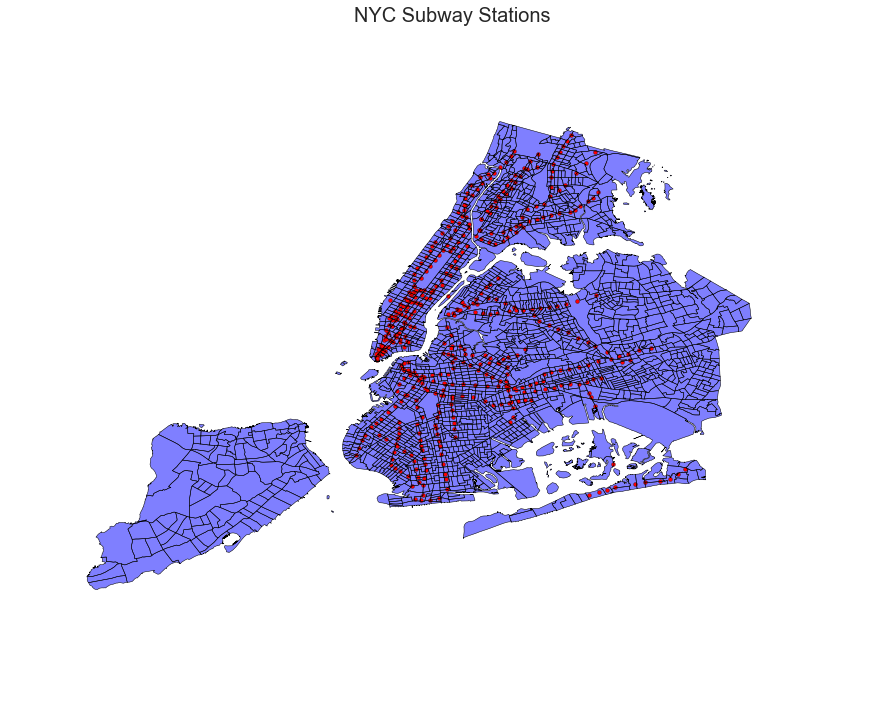

In [14]:
f, ax = pl.subplots(figsize=(15,12))

tracks.plot(c = 'k', linewidth = .5, ax = ax,  color= 'Blue')
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [15]:
for i in subStations.line:
    print i.replace(' Express','').split('-')
    print map(lambda x: x,i.replace(' Express','').split('-'))
    break

[u'4', u'6', u'6']
[u'4', u'6', u'6']


In [16]:
Amask=[]
for lines in subStations.line:
    if 'A' in lines:
        Amask.append(True)
    else:
        Amask.append(False)

In [17]:
distmat=np.empty((len(subStations[Amask]),), dtype=float)
print distmat.shape
for stations in subStations[Amask]['geometry']:
    distances=[]
    for other in subStations[Amask]['geometry']:
        distances.append(stations.distance(other))
    #print len(distances)
    distmat = np.vstack((distmat,np.array(distances)))
distmat = np.delete(distmat, 0, 0)
print distmat.shape
distmat

(66L,)
(66L, 66L)


array([[ 0.        ,  0.12188338,  0.25347895, ...,  0.15187305,
         0.16106103,  0.15654966],
       [ 0.12188338,  0.        ,  0.14890699, ...,  0.06890286,
         0.08938903,  0.08186883],
       [ 0.25347895,  0.14890699,  0.        , ...,  0.10230584,
         0.09948539,  0.10110573],
       ..., 
       [ 0.15187305,  0.06890286,  0.10230584, ...,  0.        ,
         0.02111373,  0.01370872],
       [ 0.16106103,  0.08938903,  0.09948539, ...,  0.02111373,
         0.        ,  0.0075368 ],
       [ 0.15654966,  0.08186883,  0.10110573, ...,  0.01370872,
         0.0075368 ,  0.        ]])

In [18]:
#subStations[Amask].name
for i in range(len(subStations[Amask])):
    np.sort(distmat[i],kind='quicksort')[1]
    np.where( distmat[i] == np.sort(distmat[i],kind='quicksort')[1])[0][0]
    print subStations[Amask].iloc[i]['namemod'], ',',str(subStations[Amask].iloc[np.where( distmat[i] == np.sort(distmat[i],kind='quicksort')[1])[0][0]]['namemod'])

Cathedral Pkwy (110th St) - A-B-C , 116th St - A-B-C
Kingston - Throop Aves , Nostrand Ave - A-C
Beach 105th St , Beach 98th St
Beach 90th St , Beach 98th St
Ralph Ave , Rockaway Ave - A-C
Far Rockaway - Mott Ave , Beach 25th St
72nd St - A-B-C , 81st St
96th St - A-B-C , 103rd St - A-B-C
168th St - A-C , 163rd St - Amsterdam Av
111th St - A-S , 104th St
104th St , 111th St - A-S
Broad Channel , Beach 90th St
Rockaway Blvd , 104th St
Rockaway Ave - A-C , Broadway Junction - A-C
Aqueduct Racetrack , Aqueduct - North Conduit Av
Nostrand Ave - A-C , Franklin Ave - A-C
103rd St - A-B-C , 96th St - A-B-C
81st St , 86th St - A-B-C
86th St - A-B-C , 81st St
175th St , 181st St - A
Beach 44th St , Beach 36th St
Beach 60th St , Beach 67th St
Beach 98th St , Beach 105th St
Rockaway Park - Beach 116 St , Beach 105th St
Beach 36th St , Beach 44th St
Beach 25th St , Far Rockaway - Mott Ave
Grant Ave , 80th St
Ozone Park - Lefferts Blvd , 111th St - A-S
Beach 67th St , Beach 60th St
W 4th St - Washi

In [19]:
### A Nodes
AEdges=[
    ('Inwood - 207th St', 'Dyckman St - A'),
    ('Dyckman St - A', '190th St'),
    ('190th St', '181st St - A'),
    ('181st St - A', '175th St'),
    ('175th St','168th St - A-C'),
    ('168th St - A-C','145th St - A-B-C-D'),
    ('145th St - A-B-C-D','125th St - A-B-C-D'),
    ('125th St - A-B-C-D','59th St - Columbus Circle - A-B-C-D'),
    ('59th St - Columbus Circle - A-B-C-D','42nd St - Port Authority Bus Term'), 
    ('42nd St - Port Authority Bus Term','34th St - Penn Station - A-C-E'),
    ('34th St - Penn Station - A-C-E','14th St - A-C-E'),
    ('14th St - A-C-E','W 4th St - Washington Sq (Upper)'),
    ('W 4th St - Washington Sq (Upper)','Canal St - Holland Tunnel'),
    ('Canal St - Holland Tunnel','Chambers St - A-C'),
    ('Chambers St - A-C','Fulton St - A-C'),
    ('Fulton St - A-C','High St'),
    ('High St','Jay St - MetroTech - A-C-F'),
    ('Jay St - MetroTech - A-C-F','Hoyt - Schermerhorn Sts'),
    ('Hoyt - Schermerhorn Sts','Nostrand Ave - A-C'),
    ('Nostrand Ave - A-C','Utica Ave'),
    ('Utica Ave','Broadway Junction - A-C'),
    ('Broadway Junction - A-C','Euclid Ave'),
    ('Euclid Ave','Grant Ave'),
    ('Grant Ave','80th St'),
    ('80th St','88th St'),
    ('88th St','Rockaway Blvd'),
    ('Rockaway Blvd','104th St'),
    ('104th St','111th St - A-S'),
    ('111th St - A-S','Ozone Park - Lefferts Blvd'),
    ('Rockaway Blvd','Aqueduct - North Conduit Av'),##one direction
    ('Aqueduct Racetrack','Rockaway Blvd'), ##one direction
    ('Aqueduct - North Conduit Av','Howard Beach - JFK Airport'),##one direction
    ('Howard Beach - JFK Airport','Aqueduct Racetrack'),##one direction
    ('Howard Beach - JFK Airport','Broad Channel'),
    ('Broad Channel','Beach 67th St'),
    ('Beach 67th St','Beach 60th St'),
    ('Beach 60th St','Beach 44th St'),
    ('Beach 44th St','Beach 36th St'),
    ('Beach 36th St','Beach 25th St'),
    ('Beach 25th St','Far Rockaway - Mott Ave'),
    ('Broad Channel','Beach 90th St'),
    ('Beach 90th St','Beach 98th St'),
    ('Beach 98th St','Beach 105th St'),
    ('Beach 105th St','Rockaway Park - Beach 116 St')]


In [20]:
for edge in AEdges:
    #print edge
    G.add_edge(edge[0],edge[1])
    

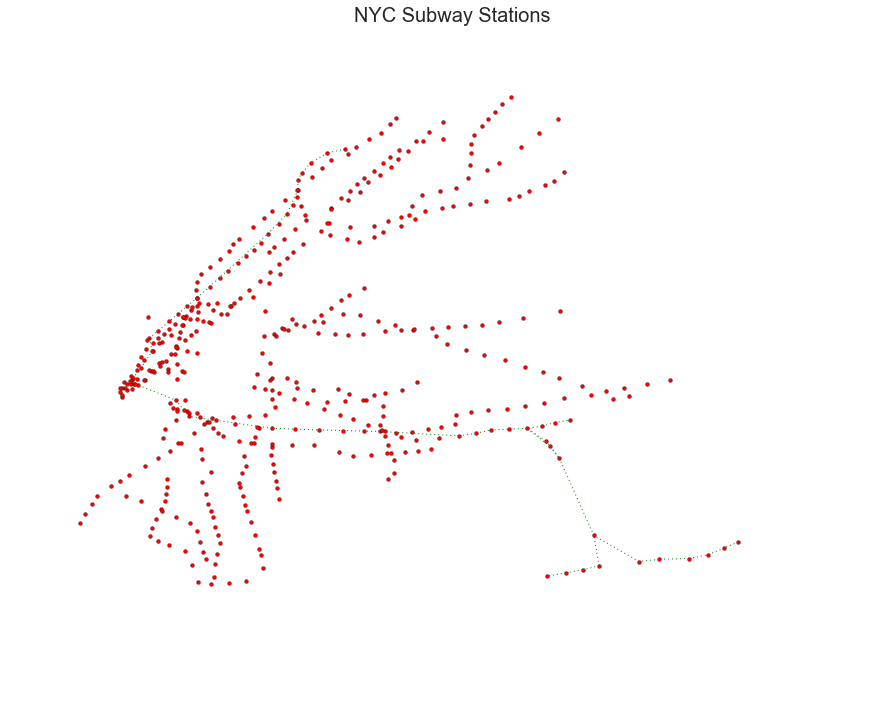

In [21]:
f, ax = pl.subplots(figsize=(15,12))

#tracks.plot(c = 'k', linewidth = .5, ax = ax,  color= 'Blue')
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [22]:
mask1=[]
for lines in subStations.line:
    if '1' in lines:
        mask1.append(True)
    else:
        mask1.append(False)

In [23]:
#subStations[Amask].name
distmat=np.empty((len(subStations[mask1]),), dtype=float)
print distmat.shape
for stations in subStations[mask1]['geometry']:
    distances=[]
    for other in subStations[mask1]['geometry']:
        distances.append(stations.distance(other))
    #print len(distances)
    distmat = np.vstack((distmat,np.array(distances)))
distmat = np.delete(distmat, 0, 0)
print distmat.shape
distmat
for i in range(len(subStations[mask1])):
    np.sort(distmat[i],kind='quicksort')[1]
    np.where( distmat[i] == np.sort(distmat[i],kind='quicksort')[1])[0][0]
    print subStations[mask1].iloc[i]['namemod'], ',',str(subStations[mask1].iloc[np.where( distmat[i] == np.sort(distmat[i],kind='quicksort')[1])[0][0]]['namemod'])

(38L,)
(38L, 38L)
50th St - 1-2 , 59th St - Columbus Circle - 1-2
238th St , Van Cortlandt Park - 242nd St
86th St - 1-2 , 79th St - 1-2
66th St - Lincoln Ctr , 72nd St - 1-2-3
Canal St - 1-2 , Franklin St
59th St - Columbus Circle - 1-2 , 66th St - Lincoln Ctr
23rd St - 1-2 , 18th St
Houston St , Canal St - 1-2
145th St - 1 , 137th St - City College
157th St , 168th St - 1
96th St - 1-2-3 , 86th St - 1-2
103rd St - 1 , Cathedral Pkwy (110th St) - 1
72nd St - 1-2-3 , 66th St - Lincoln Ctr
Cathedral Pkwy (110th St) - 1 , 116th St - Columbia University
116th St - Columbia University , Cathedral Pkwy (110th St) - 1
137th St - City College , 145th St - 1
168th St - 1 , 157th St
181st St - 1 , 191st St
191st St , Dyckman St - 1
79th St - 1-2 , 72nd St - 1-2-3
Christopher St - Sheridan Sq , 14th St - 1-2-3
28th St - 1-2 , 23rd St - 1-2
18th St , 23rd St - 1-2
Marble Hill - 225th St , 231st St
231st St , Marble Hill - 225th St
215th St , 207th St
207th St , 215th St
Van Cortlandt Park - 242nd

In [24]:
Edges1=[
    ('Van Cortlandt Park - 242nd St','238th St'),
    ('238th St','231st St'),
    ('231st St','215th St'),
    ('215th St','207th St'),
    ('207th St','Dyckman St - 1'),
    ('Dyckman St - 1','191st St'),
    ('191st St','181st St - 1'),
    ('181st St - 1','168th St - 1'),
    ('168th St - 1','157th St'),
    ('157th St','145th St - 1'),
    ('145th St - 1','137th St - City College'),
    ('137th St - City College','125th St - 1'),
    ('125th St - 1','116th St - Columbia University'),
    ('116th St - Columbia University','Cathedral Pkwy (110th St) - 1'),
    ('Cathedral Pkwy (110th St) - 1','103rd St - 1'),
    ('103rd St - 1','96th St - 1-2-3'),
    ('96th St - 1-2-3','86th St - 1-2'),
    ('86th St - 1-2','79th St - 1-2'),
    ('79th St - 1-2','72nd St - 1-2-3'),
    ('72nd St - 1-2-3','66th St - Lincoln Ctr'),
    ('66th St - Lincoln Ctr','59th St - Columbus Circle - 1-2'),
    ('59th St - Columbus Circle - 1-2','50th St - 1-2'),
    ('50th St - 1-2','Times Sq - 42nd St - 1-2-3'),
    ('Times Sq - 42nd St - 1-2-3','34th St - Penn Station - 1-2-3'),
    ('34th St - Penn Station - 1-2-3','28th St - 1-2'),
    ('28th St - 1-2','23rd St - 1-2'),
    ('23rd St - 1-2','18th St'),
    ('18th St','14th St - 1-2-3'),
    ('14th St - 1-2-3','Christopher St - Sheridan Sq'),
    ('Christopher St - Sheridan Sq','Houston St'),
    ('Houston St','Canal St - 1-2'),
    ('Canal St - 1-2','Franklin St'),
    ('Franklin St','Chambers St - 1-2-3'),
    ('Chambers St - 1-2-3','Rector St - 1'),
    #('Chambers St - 1-2-3','Cortlandt St - 1'), destroyed in 9/11
    #('Cortlandt St - 1','Rector St - 1'), destroyed in 9/11
    ('Rector St - 1','South Ferry')
    ]

In [25]:
for edge in Edges1:
    #print edge
    G.add_edge(edge[0],edge[1])

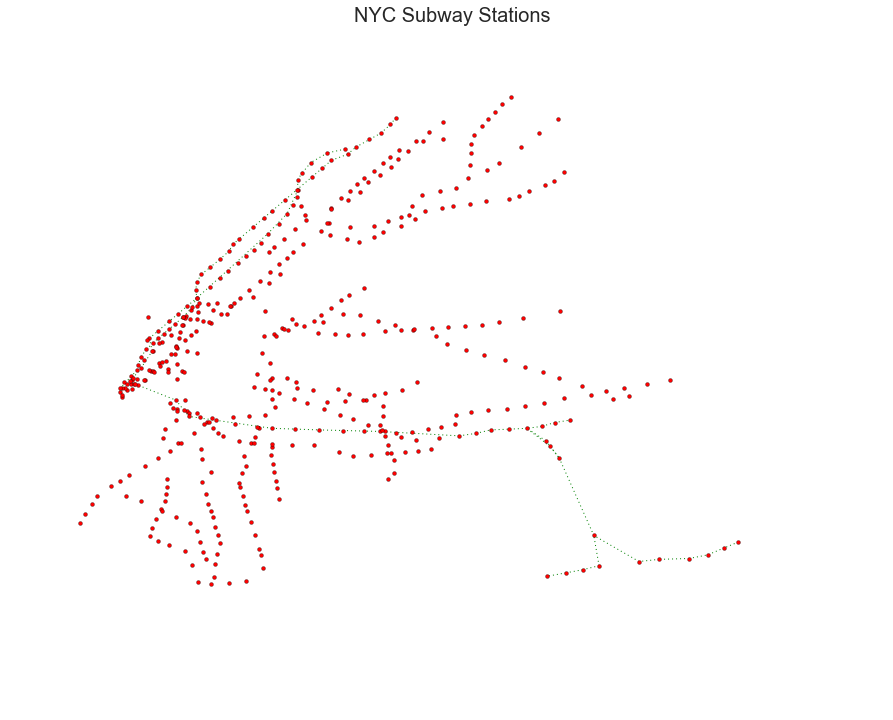

In [26]:
f, ax = pl.subplots(figsize=(15,12))

#tracks.plot(c = 'k', linewidth = .5, ax = ax,  color= 'Blue')
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [27]:
mask2=[]
for lines in subStations.line:
    if '2' in lines:
        mask2.append(True)
    else:
        mask2.append(False)

In [28]:
#subStations[Amask].name
distmat=np.empty((len(subStations[mask2]),), dtype=float)
print distmat.shape
for stations in subStations[mask2]['geometry']:
    distances=[]
    for other in subStations[mask2]['geometry']:
        distances.append(stations.distance(other))
    #print len(distances)
    distmat = np.vstack((distmat,np.array(distances)))
distmat = np.delete(distmat, 0, 0)
print distmat.shape
distmat
for i in range(len(subStations[mask2])):
    np.sort(distmat[i],kind='quicksort')[1]
    np.where( distmat[i] == np.sort(distmat[i],kind='quicksort')[1])[0][0]
    print subStations[mask2].iloc[i]['namemod'], ',',str(subStations[mask2].iloc[np.where( distmat[i] == np.sort(distmat[i],kind='quicksort')[1])[0][0]]['namemod'])

(61L,)
(61L, 61L)
50th St - 1-2 , 59th St - Columbus Circle - 1-2
Bergen St - 2-3-4 , Atlantic Av - Barclay's Center - 2-3-4-5
Freeman St , Simpson St
Intervale Ave , Simpson St
Pelham Pkwy - 2-5 , Allerton Ave
Gun Hill Rd - 2-5 , Burke Ave
Nereid Ave (238 St) , 233rd St
Franklin Ave - 2-3-4-5 , Eastern Pkwy - Bklyn Museum
Simpson St , Intervale Ave
Bronx Park East , Pelham Pkwy - 2-5
Winthrop St , Church Ave - 2-5
86th St - 1-2 , 79th St - 1-2
233rd St , 225th St
66th St - Lincoln Ctr , 72nd St - 1-2-3
Canal St - 1-2 , Franklin St
59th St - Columbus Circle - 1-2 , 66th St - Lincoln Ctr
23rd St - 1-2 , 18th St
Houston St , Canal St - 1-2
Grand Army Plaza , Bergen St - 2-3-4
Atlantic Av - Barclay's Center - 2-3-4-5 , Bergen St - 2-3-4
Nevins St , Atlantic Av - Barclay's Center - 2-3-4-5
Eastern Pkwy - Bklyn Museum , Franklin Ave - 2-3-4-5
Beverly Rd - 2-5 , Newkirk Ave - 2-5
Church Ave - 2-5 , Beverly Rd - 2-5
Newkirk Ave - 2-5 , Beverly Rd - 2-5
Brooklyn College - Flatbush Ave , Newkir

In [29]:
Edges2=[
    ('Wakefield - 241st St','Nereid Ave (238 St)'),
    ('Nereid Ave (238 St)','233rd St'),
    ('233rd St','225th St'),
    ('225th St','219th St'),
    ('219th St','Gun Hill Rd - 2-5'),
    ('Gun Hill Rd - 2-5','Burke Ave'),
    ('Burke Ave','Allerton Ave'),
    ('Allerton Ave','Pelham Pkwy - 2-5'),
    ('Pelham Pkwy - 2-5','Bronx Park East'),
    ('Bronx Park East','E 180th St'),
    ('E 180th St','West Farms Sq - E Tremont Av'),
    ('West Farms Sq - E Tremont Av','174th St'),
    ('174th St','Freeman St'),
    ('Freeman St','Simpson St'),
    ('Simpson St','Intervale Ave'),
    ('Intervale Ave','Prospect Ave - 2-5'),
    ('Prospect Ave - 2-5','Jackson Ave'),
    ('Jackson Ave','3rd Ave - 149th St'),
    ('3rd Ave - 149th St','149th St - Grand Concourse - 2-5'),
    ('149th St - Grand Concourse - 2-5','135th St - 2-3'),
    ('135th St - 2-3','125th St - 2-3'),
    ('125th St - 2-3','116th St - 2-3'),
    ('116th St - 2-3','Central Park North (110th St)'),
    ('Central Park North (110th St)','96th St - 1-2-3'),
    ('96th St - 1-2-3','72nd St - 1-2-3'),
    ('72nd St - 1-2-3','Times Sq - 42nd St - 1-2-3'),
    ('Times Sq - 42nd St - 1-2-3','34th St - Penn Station - 1-2-3'),
    ('34th St - Penn Station - 1-2-3','14th St - 1-2-3'),
    ('14th St - 1-2-3','Chambers St - 1-2-3'),
    ('Chambers St - 1-2-3','Park Pl - 2-3'),
    ('Park Pl - 2-3','Fulton St - 2-3'),
    ('Fulton St - 2-3','Wall St - 2-3'),
    ('Wall St - 2-3','Clark St'),
    ('Clark St','Borough Hall - 2-3'),
    ('Borough Hall - 2-3','Hoyt St'),
    ('Hoyt St','Nevins St'),
    ('Nevins St',"Atlantic Av - Barclay's Center - 2-3-4-5"),
    ("Atlantic Av - Barclay's Center - 2-3-4-5",'Bergen St - 2-3-4'),
    ('Bergen St - 2-3-4','Grand Army Plaza'),
    ('Grand Army Plaza','Eastern Pkwy - Bklyn Museum'),
    ('Eastern Pkwy - Bklyn Museum','Franklin Ave - 2-3-4-5'),
    ('Franklin Ave - 2-3-4-5','President St'),
    ('President St','Sterling St'),
    ('Sterling St','Winthrop St'),
    ('Winthrop St','Church Ave - 2-5'),
    ('Church Ave - 2-5','Beverly Rd - 2-5'),
    ('Beverly Rd - 2-5','Newkirk Ave - 2-5'),
    ('Newkirk Ave - 2-5','Brooklyn College - Flatbush Ave')    
    ]

In [30]:
for edge in Edges2:
    #print edge
    G.add_edge(edge[0],edge[1])

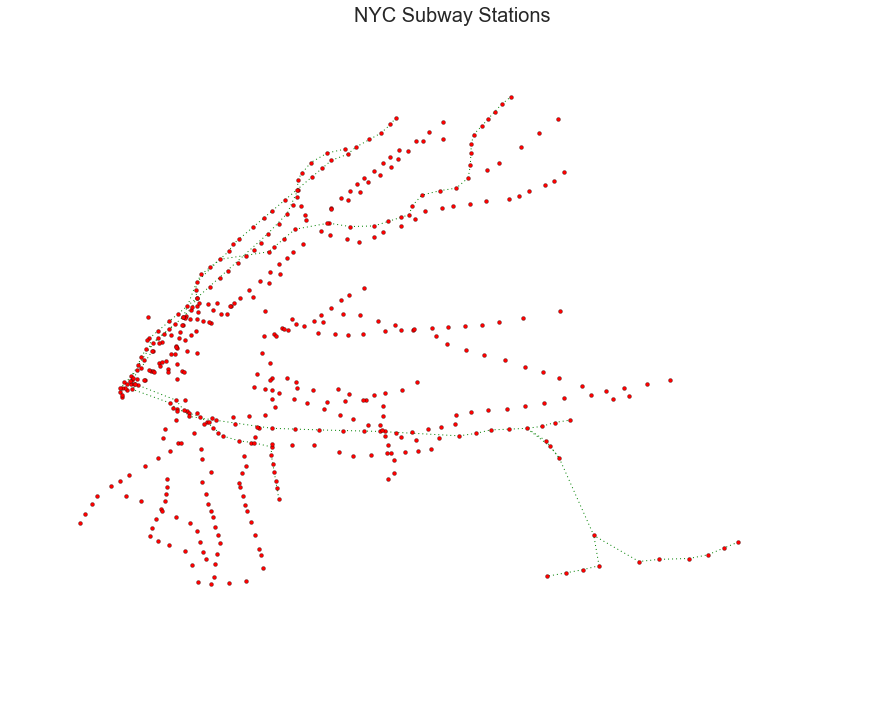

In [31]:
f, ax = pl.subplots(figsize=(15,12))

#tracks.plot(c = 'k', linewidth = .5, ax = ax,  color= 'Blue')
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [32]:
mask3=[]
for lines in subStations.line:
    if '3' in lines:
        mask3.append(True)
    else:
        mask3.append(False)

In [33]:
distmat=np.empty((len(subStations[mask3]),), dtype=float)
print distmat.shape
for stations in subStations[mask3]['geometry']:
    distances=[]
    for other in subStations[mask3]['geometry']:
        distances.append(stations.distance(other))
    #print len(distances)
    distmat = np.vstack((distmat,np.array(distances)))
distmat = np.delete(distmat, 0, 0)
print distmat.shape
distmat
for i in range(len(subStations[mask3])):
    np.sort(distmat[i],kind='quicksort')[1]
    np.where( distmat[i] == np.sort(distmat[i],kind='quicksort')[1])[0][0]
    print subStations[mask3].iloc[i]['namemod'], ',',str(subStations[mask3].iloc[np.where( distmat[i] == np.sort(distmat[i],kind='quicksort')[1])[0][0]]['namemod'])

(34L,)
(34L, 34L)
Bergen St - 2-3-4 , Atlantic Av - Barclay's Center - 2-3-4-5
Pennsylvania Ave , Van Siclen Ave - 3-4
Franklin Ave - 2-3-4-5 , Eastern Pkwy - Bklyn Museum
Van Siclen Ave - 3-4 , New Lots Ave - 3-4
Grand Army Plaza , Bergen St - 2-3-4
Atlantic Av - Barclay's Center - 2-3-4-5 , Bergen St - 2-3-4
Nevins St , Atlantic Av - Barclay's Center - 2-3-4-5
Eastern Pkwy - Bklyn Museum , Franklin Ave - 2-3-4-5
Crown Hts - Utica Ave , Kingston Ave
Kingston Ave , Nostrand Ave - 3-4
96th St - 1-2-3 , 72nd St - 1-2-3
Central Park North (110th St) , 116th St - 2-3
72nd St - 1-2-3 , 96th St - 1-2-3
125th St - 2-3 , 116th St - 2-3
135th St - 2-3 , 145th St - 3
116th St - 2-3 , Central Park North (110th St)
145th St - 3 , Harlem - 148 St
New Lots Ave - 3-4 , Van Siclen Ave - 3-4
Junius St , Rockaway Ave - 3-4
Rockaway Ave - 3-4 , Junius St
Saratoga Ave , Sutter Ave - Rutland Road
Sutter Ave - Rutland Road , Saratoga Ave
Harlem - 148 St , 145th St - 3
34th St - Penn Station - 1-2-3 , Times 

In [34]:
Edges3=[
    ('Harlem - 148 St','145th St - 3'),
    ('145th St - 3','135th St - 2-3'),
    ('135th St - 2-3','125th St - 2-3'),
    ('125th St - 2-3','116th St - 2-3'),
    ('116th St - 2-3','Central Park North (110th St)'),
    ('Central Park North (110th St)','96th St - 1-2-3'),
    ('96th St - 1-2-3','72nd St - 1-2-3'),
    ('72nd St - 1-2-3','Times Sq - 42nd St - 1-2-3'),
    ('Times Sq - 42nd St - 1-2-3','34th St - Penn Station - 1-2-3'),
    ('34th St - Penn Station - 1-2-3','14th St - 1-2-3'),
    ('14th St - 1-2-3','Chambers St - 1-2-3'),
    ('Chambers St - 1-2-3','Park Pl - 2-3'),
    ('Park Pl - 2-3','Fulton St - 2-3'),
    ('Fulton St - 2-3','Wall St - 2-3'),
    ('Wall St - 2-3','Clark St'),
    ('Clark St','Borough Hall - 2-3'),
    ('Borough Hall - 2-3','Hoyt St'),
    ('Hoyt St','Nevins St'),
    ('Nevins St',"Atlantic Av - Barclay's Center - 2-3-4-5"),
    ("Atlantic Av - Barclay's Center - 2-3-4-5",'Bergen St - 2-3-4'),
    ('Bergen St - 2-3-4','Grand Army Plaza'),
    ('Grand Army Plaza','Eastern Pkwy - Bklyn Museum'),
    ('Eastern Pkwy - Bklyn Museum','Franklin Ave - 2-3-4-5'),
    ('Franklin Ave - 2-3-4-5','Nostrand Ave - 3-4'),
    ('Nostrand Ave - 3-4','Kingston Ave'),
    ('Kingston Ave','Crown Hts - Utica Ave'),
    ('Crown Hts - Utica Ave','Sutter Ave - Rutland Road'),
    ('Sutter Ave - Rutland Road','Saratoga Ave'),
    ('Saratoga Ave','Rockaway Ave - 3-4'),
    ('Rockaway Ave - 3-4','Junius St'),
    ('Junius St','Pennsylvania Ave'),
    ('Pennsylvania Ave','Van Siclen Ave - 3-4'),
    ('Van Siclen Ave - 3-4','New Lots Ave - 3-4')
    ]

In [35]:
for edge in Edges3:
    #print edge
    G.add_edge(edge[0],edge[1])

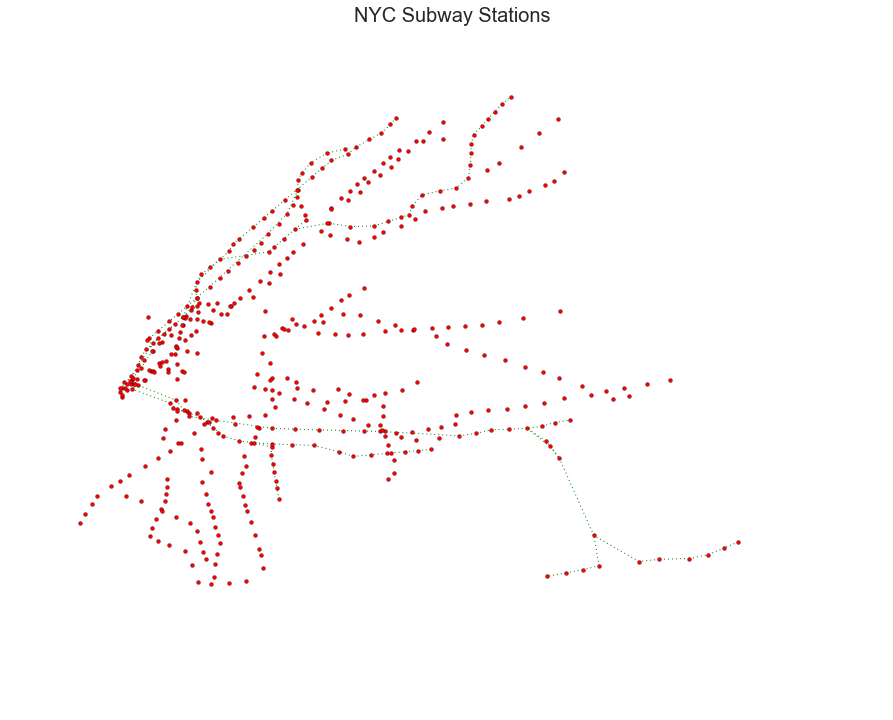

In [36]:
f, ax = pl.subplots(figsize=(15,12))
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [37]:
def getclosest(name):
    mask=[]
    for lines in subStations.line:
        if name in lines:
            mask.append(True)
        else:
            mask.append(False)
    distmat=np.empty((len(subStations[mask]),), dtype=float)
    print distmat.shape
    for stations in subStations[mask]['geometry']:
        distances=[]
        for other in subStations[mask]['geometry']:
            distances.append(stations.distance(other))
        #print len(distances)
        distmat = np.vstack((distmat,np.array(distances)))
    distmat = np.delete(distmat, 0, 0)
    print distmat.shape
    distmat
    for i in range(len(subStations[mask])):
        np.sort(distmat[i],kind='quicksort')[1]
        np.where( distmat[i] == np.sort(distmat[i],kind='quicksort')[1])[0][0]
        print subStations[mask].iloc[i]['namemod'], ',',str(subStations[mask].iloc[np.where( distmat[i] == np.sort(distmat[i],kind='quicksort')[1])[0][0]]['namemod'])

In [38]:
getclosest('L')

(24L,)
(24L, 24L)
Lorimer St - L , Graham Ave
Sutter Ave , Livonia Ave
Wilson Ave , Bushwick - Aberdeen
1st Ave , 3rd Ave
Grand St - L , Montrose Ave
Graham Ave , Grand St - L
Bedford Ave , Lorimer St - L
Montrose Ave , Grand St - L
Atlantic Ave , Broadway Junction - L
Halsey St - L , Wilson Ave
Myrtle - Wyckoff Aves - L , Halsey St - L
Livonia Ave , Sutter Ave
Canarsie - Rockaway Pkwy , E 105th St
E 105th St , Canarsie - Rockaway Pkwy
New Lots Ave - L , Livonia Ave
DeKalb Ave - L , Jefferson St
Bushwick - Aberdeen , Broadway Junction - L
Broadway Junction - L , Atlantic Ave
Jefferson St , DeKalb Ave - L
Morgan Ave , Montrose Ave
3rd Ave , 1st Ave
Union Sq - 14th St - L , 3rd Ave
6th Ave , 8th Ave - L
8th Ave - L , 6th Ave


In [39]:
EdgesL=[
    ('8th Ave - L','6th Ave'),
    ('6th Ave','Union Sq - 14th St - L'),
    ('Union Sq - 14th St - L','3rd Ave'),
    ('3rd Ave','1st Ave'),
    ('1st Ave','Bedford Ave'),
    ('Bedford Ave','Lorimer St - L'),
    ('Lorimer St - L','Graham Ave'),
    ('Graham Ave','Grand St - L'),
    ('Grand St - L','Montrose Ave'),
    ('Montrose Ave','Morgan Ave'),
    ('Morgan Ave','Jefferson St'),
    ('Jefferson St','DeKalb Ave - L'),
    ('DeKalb Ave - L','Myrtle - Wyckoff Aves - L'),
    ('Myrtle - Wyckoff Aves - L','Halsey St - L'),
    ('Halsey St - L','Wilson Ave'),
    ('Wilson Ave','Bushwick - Aberdeen'),
    ('Bushwick - Aberdeen','Broadway Junction - L'),
    ('Broadway Junction - L','Atlantic Ave'),
    ('Atlantic Ave','Sutter Ave'),
    ('Sutter Ave','Livonia Ave'),
    ('Livonia Ave','New Lots Ave - L'),
    ('New Lots Ave - L','E 105th St'),
    ('E 105th St','Canarsie - Rockaway Pkwy')
    ]

In [40]:
for edge in EdgesL:
    #print edge
    G.add_edge(edge[0],edge[1])

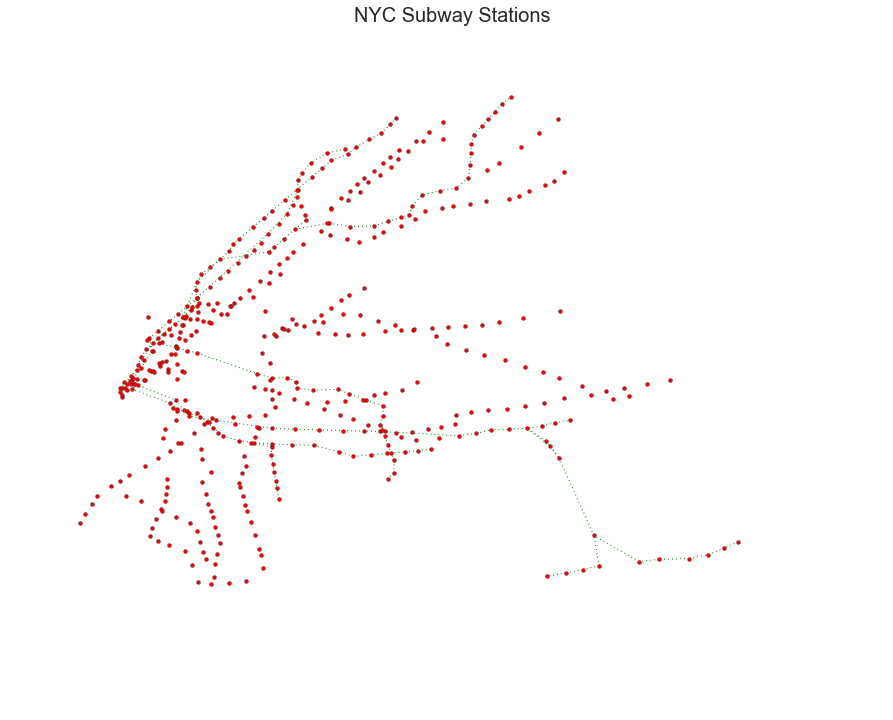

In [41]:
f, ax = pl.subplots(figsize=(15,12))
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [42]:
getclosest('G')

(21L,)
(21L, 21L)
Classon Ave , Bedford - Nostrand Aves
Broadway - G , Flushing Ave - G
Bedford - Nostrand Aves , Classon Ave
15th St - Prospect Park , 7th Ave - F-G
7th Ave - F-G , 15th St - Prospect Park
Ft Hamilton Pkwy - F-G , Church Ave - F-G
Church Ave - F-G , Ft Hamilton Pkwy - F-G
Fulton St - G , Clinton - Washington Aves - G
Clinton - Washington Aves - G , Classon Ave
Nassau Ave , Greenpoint Ave
Greenpoint Ave , Nassau Ave
Metropolitan Ave , Broadway - G
Long Island City - Court Sq , 21st St
21st St , Long Island City - Court Sq
Myrtle-Willoughby Aves , Flushing Ave - G
Flushing Ave - G , Broadway - G
Hoyt - Schermerhorn Sts , Bergen St - F-G
4th Av - 9th St - F-G , Smith - 9th Sts
Smith - 9th Sts , Carroll St
Bergen St - F-G , Hoyt - Schermerhorn Sts
Carroll St , Smith - 9th Sts


In [43]:
EdgeG=[
    ('Long Island City - Court Sq','21st St'),
    ('21st St','Greenpoint Ave'),
    ('Greenpoint Ave','Nassau Ave'),
    ('Nassau Ave','Metropolitan Ave'),
    ('Metropolitan Ave','Broadway - G'),
    ('Broadway - G','Flushing Ave - G'),
    ('Flushing Ave - G','Myrtle-Willoughby Aves'),
    ('Myrtle-Willoughby Aves','Bedford - Nostrand Aves'),
    ('Bedford - Nostrand Aves','Classon Ave'),
    ('Classon Ave','Clinton - Washington Aves - G'),
    ('Clinton - Washington Aves - G','Fulton St - G'),
    ('Fulton St - G','Hoyt - Schermerhorn Sts'),
    ('Hoyt - Schermerhorn Sts','Bergen St - F-G'),
    ('Bergen St - F-G','Carroll St'),
    ('Carroll St','Smith - 9th Sts'),
    ('Smith - 9th Sts','4th Av - 9th St - F-G'),
    ('4th Av - 9th St - F-G','7th Ave - F-G'),
    ('7th Ave - F-G','15th St - Prospect Park'),
    ('15th St - Prospect Park','Ft Hamilton Pkwy - F-G'),
    ('Ft Hamilton Pkwy - F-G','Church Ave - F-G')
    ]

In [44]:
for edge in EdgeG:
    #print edge
    G.add_edge(edge[0],edge[1])

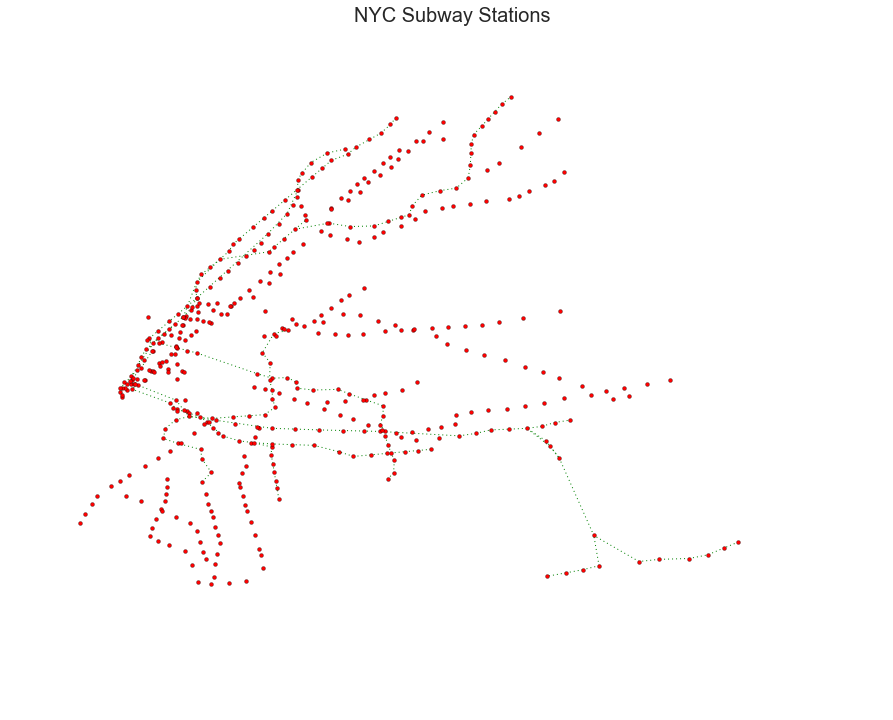

In [45]:
f, ax = pl.subplots(figsize=(15,12))
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [46]:
getclosest('C')

(40L,)
(40L, 40L)
Cathedral Pkwy (110th St) - A-B-C , 116th St - A-B-C
Kingston - Throop Aves , Nostrand Ave - A-C
Ralph Ave , Rockaway Ave - A-C
72nd St - A-B-C , 81st St
96th St - A-B-C , 103rd St - A-B-C
168th St - A-C , 163rd St - Amsterdam Av
Rockaway Ave - A-C , Broadway Junction - A-C
Nostrand Ave - A-C , Franklin Ave - A-C
103rd St - A-B-C , 96th St - A-B-C
81st St , 86th St - A-B-C
86th St - A-B-C , 81st St
W 4th St - Washington Sq (Upper) , Spring St - A-C-E
Van Siclen Ave - A-C , Liberty Ave
Shepherd Ave , Euclid Ave
145th St - A-B-C-D , 155th St - A-C
Utica Ave , Ralph Ave
50th St - A-C-E , 42nd St - Port Authority Bus Term
59th St - Columbus Circle - A-B-C-D , 50th St - A-C-E
Fulton St - A-C , Chambers St - A-C
Chambers St - A-C , Fulton St - A-C
42nd St - Port Authority Bus Term , 34th St - Penn Station - A-C-E
Hoyt - Schermerhorn Sts , Jay St - MetroTech - A-C-F
Jay St - MetroTech - A-C-F , Hoyt - Schermerhorn Sts
Liberty Ave , Van Siclen Ave - A-C
Broadway Junction - A-

In [47]:
EdgesC=[
    ('168th St - A-C','163rd St - Amsterdam Av'),
    ('163rd St - Amsterdam Av','155th St - A-C'),
    ('155th St - A-C','145th St - A-B-C-D'),
    ('145th St - A-B-C-D','135th St - A-B-C'),
    ('135th St - A-B-C','125th St - A-B-C-D'),
    ('125th St - A-B-C-D','116th St - A-B-C'),
    ('116th St - A-B-C','Cathedral Pkwy (110th St) - A-B-C'),
    ('Cathedral Pkwy (110th St) - A-B-C','103rd St - A-B-C'),
    ('103rd St - A-B-C','96th St - A-B-C'),
    ('96th St - A-B-C','86th St - A-B-C'),
    ('86th St - A-B-C','81st St'),
    ('81st St','72nd St - A-B-C'),
    ('72nd St - A-B-C','59th St - Columbus Circle - A-B-C-D'),
    ('59th St - Columbus Circle - A-B-C-D','50th St - A-C-E'),
    ('50th St - A-C-E','42nd St - Port Authority Bus Term'),
    ('42nd St - Port Authority Bus Term','34th St - Penn Station - A-C-E'),
    ('34th St - Penn Station - A-C-E','23rd St - A-C-E'),
    ('23rd St - A-C-E','14th St - A-C-E'),
    ('14th St - A-C-E','W 4th St - Washington Sq (Upper)'),
    ('W 4th St - Washington Sq (Upper)','Spring St - A-C-E'),
    ('Spring St - A-C-E','Canal St - Holland Tunnel'),
    ('Canal St - Holland Tunnel','Chambers St - A-C'),
    ('Chambers St - A-C','Fulton St - A-C'),
    ('Fulton St - A-C','High St'),
    ('High St','Jay St - MetroTech - A-C-F'),
    ('Jay St - MetroTech - A-C-F','Hoyt - Schermerhorn Sts'),
    ('Hoyt - Schermerhorn Sts','Lafayette Ave'),
    ('Lafayette Ave','Clinton - Washington Aves - A-C'),
    ('Clinton - Washington Aves - A-C','Franklin Ave - A-C'),
    ('Franklin Ave - A-C','Nostrand Ave - A-C'),
    ('Nostrand Ave - A-C','Kingston - Throop Aves'),
    ('Kingston - Throop Aves','Utica Ave'),
    ('Utica Ave','Ralph Ave'),
    ('Ralph Ave','Rockaway Ave - A-C'),
    ('Rockaway Ave - A-C','Broadway Junction - A-C'),
    ('Broadway Junction - A-C','Liberty Ave'),
    ('Liberty Ave','Van Siclen Ave - A-C'),
    ('Van Siclen Ave - A-C','Shepherd Ave'),
    ('Shepherd Ave','Euclid Ave')
    ]

In [48]:
for edge in EdgesC:
    #print edge
    G.add_edge(edge[0],edge[1])

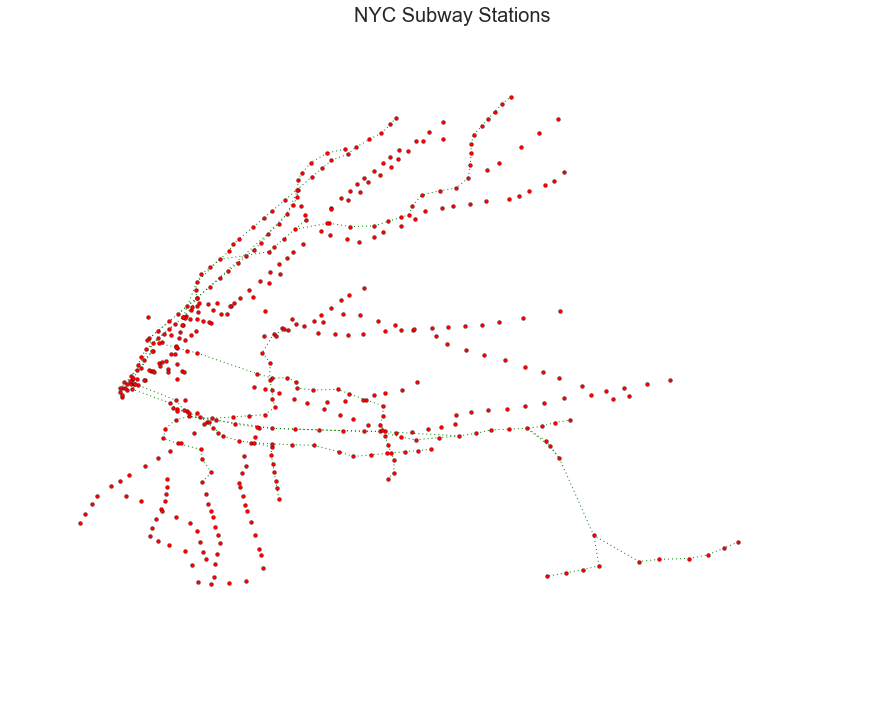

In [49]:
f, ax = pl.subplots(figsize=(15,12))
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [50]:
getclosest('E-')

(21L,)
(21L, 21L)
65th St , Northern Blvd
36th St - E-M-R , Queens Plz
Elmhurst Ave , Grand Ave - Newtown
Kew Gardens - Union Tpke , 75th Ave
Sutphin Blvd - Archer Av , Jamaica Ctr - Parsons / Archer
Court Sq - 23rd St , Queens Plz
67th Ave , 63rd Dr - Rego Park
Grand Ave - Newtown , Elmhurst Ave
5th Ave - 53rd St , Lexington Ave - 53rd St
Lexington Ave - 53rd St , 5th Ave - 53rd St
75th Ave , Kew Gardens - Union Tpke
63rd Dr - Rego Park , Woodhaven Blvd - Queens Mall
Woodhaven Blvd - Queens Mall , 63rd Dr - Rego Park
46th St - E-M-R , Steinway St
Northern Blvd , 65th St
Briarwood - Van Wyck Blvd , Kew Gardens - Union Tpke
Forest Hills - 71st Av , 75th Ave
Jamaica Ctr - Parsons / Archer , Sutphin Blvd - Archer Av
Steinway St , 46th St - E-M-R
Queens Plz , 36th St - E-M-R
Jackson Hts - Roosevelt Av , 65th St


In [51]:
getclosest('-E')

(9L,)
(9L, 9L)
W 4th St - Washington Sq (Upper) , Spring St - A-C-E
50th St - A-C-E , 7th Ave - B-D-E
7th Ave - B-D-E , 50th St - A-C-E
42nd St - Port Authority Bus Term , 34th St - Penn Station - A-C-E
Spring St - A-C-E , Canal St - Holland Tunnel
Canal St - Holland Tunnel , Spring St - A-C-E
23rd St - A-C-E , 14th St - A-C-E
34th St - Penn Station - A-C-E , 42nd St - Port Authority Bus Term
14th St - A-C-E , 23rd St - A-C-E


In [52]:
getclosest('E')

(73L,)
(73L, 73L)
Astor Pl , Union Sq - 14th St - 4-5-6-6
Canal St - 4-6-6 , Spring St - 4-6-6
65th St , Woodside - 61st St
36th St - E-M-R , Queens Plz
Mets - Willets Point , Flushing - Main St
Junction Blvd , Elmhurst Ave
Flushing - Main St , Mets - Willets Point
Buhre Ave , Middletown Rd
3rd Ave - 138th St , 125th St - 4-5-6-6
Castle Hill Ave , Zerega Ave
Brooklyn Bridge - City Hall , World Trade Center
Zerega Ave , Castle Hill Ave
Grand Central - 42nd St - 4-5-6-6 , Grand Central - 42nd St - 7-7
33rd St - 4-6-6 , 28th St - 4-6-6
96th St - 4-6-6 , 103rd St - 4-6-6
77th St - 4-6-6 , 68th St - Hunter College
Elmhurst Ave , Grand Ave - Newtown
Lexington Ave - 59th St - 4-5-6-6 , Lexington Ave - 53rd St
Woodside - 61st St , 65th St
Jamaica - Van Wyck , Briarwood - Van Wyck Blvd
Kew Gardens - Union Tpke , 75th Ave
Sutphin Blvd - Archer Av , Jamaica Ctr - Parsons / Archer
Court Sq - 23rd St , Court Sq
67th Ave , 63rd Dr - Rego Park
Grand Ave - Newtown , Elmhurst Ave
51st St , Lexington Av

In [53]:
EdgeE = [
    ('Jamaica Ctr - Parsons / Archer','Sutphin Blvd - Archer Av'),
    ('Sutphin Blvd - Archer Av','Jamaica - Van Wyck'),
    ('Jamaica - Van Wyck','Briarwood - Van Wyck Blvd'),
    ('Briarwood - Van Wyck Blvd','Kew Gardens - Union Tpke'),
    ('Kew Gardens - Union Tpke','75th Ave'),
    ('75th Ave','Forest Hills - 71st Av'),
    ('Forest Hills - 71st Av','Jackson Hts - Roosevelt Av'),
    ('Jackson Hts - Roosevelt Av','Queens Plz'),
    ('Queens Plz','Court Sq - 23rd St'),
    ('Court Sq - 23rd St','Lexington Ave - 53rd St'),
    ('Lexington Ave - 53rd St','5th Ave - 53rd St'),
    ('5th Ave - 53rd St','7th Ave - B-D-E'),
    ('7th Ave - B-D-E','50th St - A-C-E'),
    ('50th St - A-C-E','42nd St - Port Authority Bus Term'),
    ('42nd St - Port Authority Bus Term','34th St - Penn Station - A-C-E'),
    ('34th St - Penn Station - A-C-E','23rd St - A-C-E'),
    ('23rd St - A-C-E','14th St - A-C-E'),
    ('14th St - A-C-E','W 4th St - Washington Sq (Upper)'),
    ('W 4th St - Washington Sq (Upper)','Spring St - A-C-E'),
    ('Spring St - A-C-E','Canal St - Holland Tunnel'),
    ('Canal St - Holland Tunnel','World Trade Center')
    ]


In [54]:
for edge in EdgeE:
    #print edge
    G.add_edge(edge[0],edge[1])

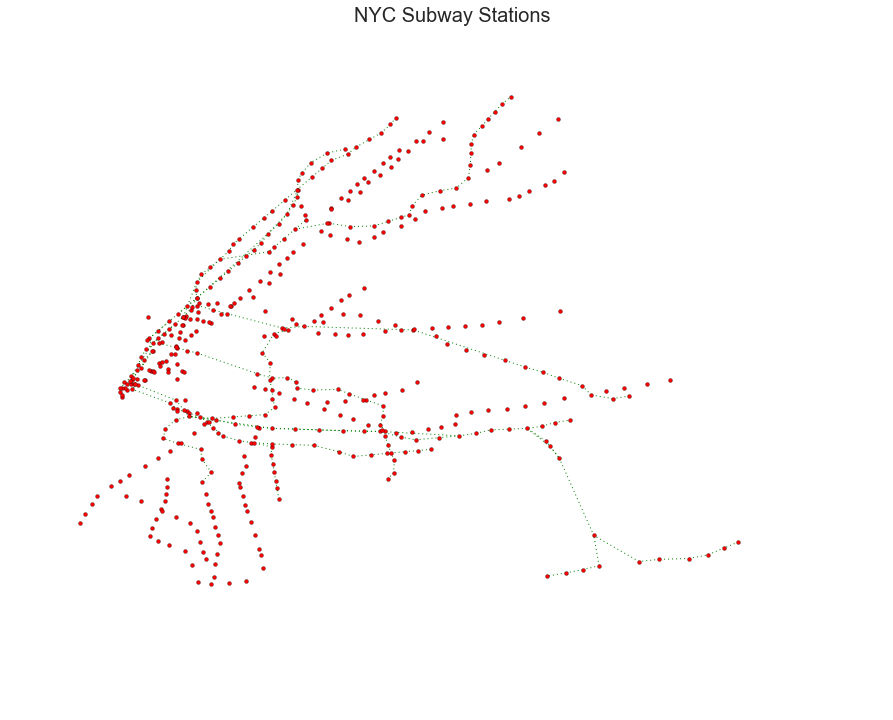

In [55]:
f, ax = pl.subplots(figsize=(15,12))
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [56]:
getclosest('4')

(54L,)
(54L, 54L)
Astor Pl , Union Sq - 14th St - 4-5-6-6
Canal St - 4-6-6 , Spring St - 4-6-6
Bergen St - 2-3-4 , Atlantic Av - Barclay's Center - 2-3-4-5
Pennsylvania Ave , Van Siclen Ave - 3-4
Brooklyn Bridge - City Hall , Fulton St - 4-5
Grand Central - 42nd St - 4-5-6-6 , 51st St
33rd St - 4-6-6 , 28th St - 4-6-6
96th St - 4-6-6 , 103rd St - 4-6-6
77th St - 4-6-6 , 68th St - Hunter College
Franklin Ave - 2-3-4-5 , Eastern Pkwy - Bklyn Museum
Van Siclen Ave - 3-4 , New Lots Ave - 3-4
149th St - Grand Concourse - 4 , 138th St - Grand Concourse
161st St - Yankee Stadium - 4 , 167th St - 4
Lexington Ave - 59th St - 4-5-6-6 , 51st St
51st St , Lexington Ave - 59th St - 4-5-6-6
23rd St - 4-6-6 , 28th St - 4-6-6
68th St - Hunter College , 77th St - 4-6-6
Union Sq - 14th St - 4-5-6-6 , Astor Pl
Grand Army Plaza , Bergen St - 2-3-4
Atlantic Av - Barclay's Center - 2-3-4-5 , Bergen St - 2-3-4
Borough Hall - 4-5 , Nevins St
Nevins St , Atlantic Av - Barclay's Center - 2-3-4-5
Eastern Pkwy - 

In [57]:
Edge4 = [
    ('Woodlawn','Mosholu Pkwy'),
    ('Mosholu Pkwy','Bedford Park Blvd - Lehman College'),
    ('Bedford Park Blvd - Lehman College','Kingsbridge Rd - 4'),
    ('Kingsbridge Rd - 4','Fordham Rd - 4'),
    ('Fordham Rd - 4','183rd St'),
    ('183rd St','Burnside Ave'),
    ('Burnside Ave','176th St'),
    ('176th St','Mt Eden Ave'),
    ('Mt Eden Ave','170th St - 4'),
    ('170th St - 4','167th St - 4'),
    ('167th St - 4','161st St - Yankee Stadium - 4'),
    ('161st St - Yankee Stadium - 4','149th St - Grand Concourse - 4'),
    #skipping the 138th station during rush hours
    ('149th St - Grand Concourse - 4','138th St - Grand Concourse'),
    ('138th St - Grand Concourse','125th St - 4-5-6-6'),
    ('125th St - 4-5-6-6','86th St - 4-5-6-6'),
    ('86th St - 4-5-6-6','Lexington Ave - 59th St - 4-5-6-6'),
    ('Lexington Ave - 59th St - 4-5-6-6','Grand Central - 42nd St - 4-5-6-6'),
    ('Grand Central - 42nd St - 4-5-6-6','Union Sq - 14th St - 4-5-6-6'),
    ('Union Sq - 14th St - 4-5-6-6','Brooklyn Bridge - City Hall'),
    ('Brooklyn Bridge - City Hall','Fulton St - 4-5'),
    ('Fulton St - 4-5','Wall St - 4-5'),
    ('Wall St - 4-5','Bowling Green'),
    ('Bowling Green','Borough Hall - 4-5'),
    ('Borough Hall - 4-5','Nevins St'),
    ('Nevins St',"Atlantic Av - Barclay's Center - 2-3-4-5"),
    ("Atlantic Av - Barclay's Center - 2-3-4-5",'Franklin Ave - 2-3-4-5'),
    ('Franklin Ave - 2-3-4-5','Crown Hts - Utica Ave')
    ]

In [58]:
for edge in Edge4:
    #print edge
    G.add_edge(edge[0],edge[1])

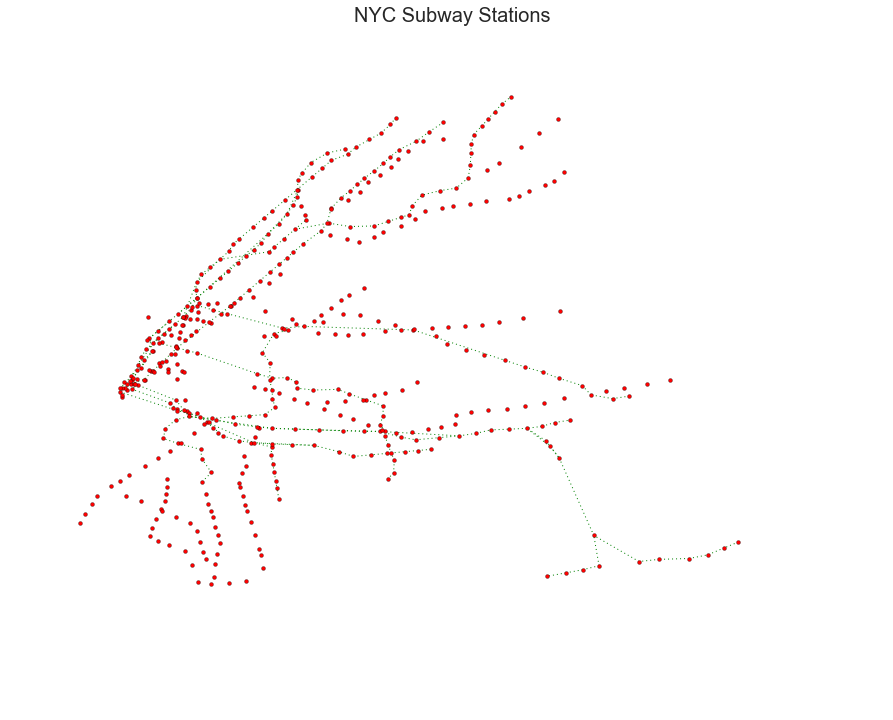

In [59]:
f, ax = pl.subplots(figsize=(15,12))
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [60]:
getclosest('5')

(45L,)
(45L, 45L)
Freeman St , Simpson St
Intervale Ave , Simpson St
Brooklyn Bridge - City Hall , Fulton St - 4-5
Grand Central - 42nd St - 4-5-6-6 , Lexington Ave - 59th St - 4-5-6-6
Pelham Pkwy - 2-5 , Morris Park
Gun Hill Rd - 2-5 , Burke Ave
Nereid Ave (238 St) , 233rd St
Franklin Ave - 2-3-4-5 , President St
Simpson St , Intervale Ave
Bronx Park East , Pelham Pkwy - 2-5
Winthrop St , Church Ave - 2-5
Lexington Ave - 59th St - 4-5-6-6 , Grand Central - 42nd St - 4-5-6-6
233rd St , 225th St
Union Sq - 14th St - 4-5-6-6 , Grand Central - 42nd St - 4-5-6-6
Atlantic Av - Barclay's Center - 2-3-4-5 , Nevins St
Borough Hall - 4-5 , Nevins St
Morris Park , Pelham Pkwy - 5
Pelham Pkwy - 5 , Morris Park
Nevins St , Atlantic Av - Barclay's Center - 2-3-4-5
Beverly Rd - 2-5 , Newkirk Ave - 2-5
Church Ave - 2-5 , Beverly Rd - 2-5
Newkirk Ave - 2-5 , Beverly Rd - 2-5
Brooklyn College - Flatbush Ave , Newkirk Ave - 2-5
Sterling St , President St
138th St - Grand Concourse , 149th St - Grand Con

In [61]:
Edge5 = [
    ('Eastchester - Dyre Ave','Baychester Ave'),
    ('Baychester Ave','Gun Hill Rd - 5'),
    ('Gun Hill Rd - 5','Pelham Pkwy - 5'),
    ('Pelham Pkwy - 5','Morris Park'),
    ('Morris Park','E 180th St'),
    ('E 180th St','West Farms Sq - E Tremont Av'),
    ('West Farms Sq - E Tremont Av','174th St'),
    ('174th St','Freeman St'),
    ('Freeman St','Simpson St'),
    ('Simpson St','Intervale Ave'),
    ('Intervale Ave','Prospect Ave - 2-5'),
    ('Prospect Ave - 2-5','Jackson Ave'),
    ('Jackson Ave','3rd Ave - 149th St'),
    ('3rd Ave - 149th St','138th St - Grand Concourse'),
    ('138th St - Grand Concourse','125th St - 4-5-6-6'),
    ('125th St - 4-5-6-6','86th St - 4-5-6-6'),
    ('86th St - 4-5-6-6','Lexington Ave - 59th St - 4-5-6-6'),
    ('Lexington Ave - 59th St - 4-5-6-6','Grand Central - 42nd St - 4-5-6-6'),
    ('Grand Central - 42nd St - 4-5-6-6','Union Sq - 14th St - 4-5-6-6'),
    ('Union Sq - 14th St - 4-5-6-6','Brooklyn Bridge - City Hall'),
    ('Brooklyn Bridge - City Hall','Fulton St - 4-5'),
    ('Fulton St - 4-5','Wall St - 4-5'),
    ('Wall St - 4-5','Bowling Green'),
    ('Bowling Green','Borough Hall - 4-5'),
    ('Borough Hall - 4-5','Nevins St'),
    ('Nevins St',"Atlantic Av - Barclay's Center - 2-3-4-5"),
    ("Atlantic Av - Barclay's Center - 2-3-4-5",'Franklin Ave - 2-3-4-5'),
    ('Franklin Ave - 2-3-4-5','President St'),
    ('President St','Sterling St'),
    ('Sterling St','Winthrop St'),
    ('Winthrop St','Church Ave - 2-5'),
    ('Church Ave - 2-5','Beverly Rd - 2-5'),
    ('Beverly Rd - 2-5','Newkirk Ave - 2-5'),
    ('Newkirk Ave - 2-5','Brooklyn College - Flatbush Ave')
    ]

In [62]:
for edge in Edge5:
    #print edge
    G.add_edge(edge[0],edge[1])

In [63]:
getclosest('6')

(38L,)
(38L, 38L)
Astor Pl , Union Sq - 14th St - 4-5-6-6
Canal St - 4-6-6 , Spring St - 4-6-6
Buhre Ave , Middletown Rd
3rd Ave - 138th St , Brook Ave
Castle Hill Ave , Zerega Ave
Brooklyn Bridge - City Hall , Canal St - 4-6-6
Zerega Ave , Castle Hill Ave
Grand Central - 42nd St - 4-5-6-6 , 51st St
33rd St - 4-6-6 , 28th St - 4-6-6
96th St - 4-6-6 , 103rd St - 4-6-6
77th St - 4-6-6 , 68th St - Hunter College
Lexington Ave - 59th St - 4-5-6-6 , 51st St
E 149th St , E 143rd St - St Mary's St
Morrison Av - Soundview , Elder Ave
Whitlock Ave , Hunts Point Ave
St Lawrence Ave , Parkchester
51st St , Lexington Ave - 59th St - 4-5-6-6
Hunts Point Ave , Whitlock Ave
Middletown Rd , Buhre Ave
23rd St - 4-6-6 , 28th St - 4-6-6
68th St - Hunter College , 77th St - 4-6-6
Union Sq - 14th St - 4-5-6-6 , Astor Pl
28th St - 4-6-6 , 33rd St - 4-6-6
Pelham Bay Park , Buhre Ave
Westchester Sq - E Tremont Ave , Zerega Ave
Elder Ave , Morrison Av - Soundview
Longwood Ave , Hunts Point Ave
Cypress Ave , Br

In [64]:
Edge6 = [
    ('Pelham Bay Park','Buhre Ave'),
    ('Buhre Ave','Middletown Rd'),
    ('Middletown Rd','Westchester Sq - E Tremont Ave'),
    ('Westchester Sq - E Tremont Ave','Zerega Ave'),
    ('Zerega Ave','Castle Hill Ave'),
    ('Castle Hill Ave','Parkchester'),
    ('Parkchester','St Lawrence Ave'),
    ('St Lawrence Ave','Morrison Av - Soundview'),
    ('Morrison Av - Soundview','Elder Ave'),
    ('Elder Ave','Whitlock Ave'),
    ('Whitlock Ave','Hunts Point Ave'),
    ('Hunts Point Ave','Longwood Ave'),
    ('Longwood Ave','E 149th St'),
    ("E 149th St","E 143rd St - St Mary's St"),
    ("E 143rd St - St Mary's St",'Cypress Ave'),
    ('Cypress Ave','Brook Ave'),
    ('Brook Ave','3rd Ave - 138th St'),
    ('3rd Ave - 138th St','125th St - 4-5-6-6'),
    ('125th St - 4-5-6-6','116th St - 4-6-6'),
    ('116th St - 4-6-6','110th St'),
    ('110th St','103rd St - 4-6-6'),
    ('103rd St - 4-6-6','96th St - 4-6-6'),
    ('96th St - 4-6-6','86th St - 4-5-6-6'),
    ('86th St - 4-5-6-6','77th St - 4-6-6'),
    ('77th St - 4-6-6','68th St - Hunter College'),
    ('68th St - Hunter College','Lexington Ave - 59th St - 4-5-6-6'),
    ('Lexington Ave - 59th St - 4-5-6-6','51st St'),
    ('51st St','Grand Central - 42nd St - 4-5-6-6'),
    ('Grand Central - 42nd St - 4-5-6-6','33rd St - 4-6-6'),
    ('33rd St - 4-6-6','28th St - 4-6-6'),
    ('28th St - 4-6-6','23rd St - 4-6-6'),
    ('23rd St - 4-6-6','Union Sq - 14th St - 4-5-6-6'),
    ('Union Sq - 14th St - 4-5-6-6','Astor Pl'),
    ('Astor Pl','Bleecker St'),
    ('Bleecker St','Spring St - 4-6-6'),
    ('Spring St - 4-6-6','Canal St - 4-6-6'),
    ('Canal St - 4-6-6','Brooklyn Bridge - City Hall')
    ]

In [65]:
for edge in Edge6:
    #print edge
    G.add_edge(edge[0],edge[1])

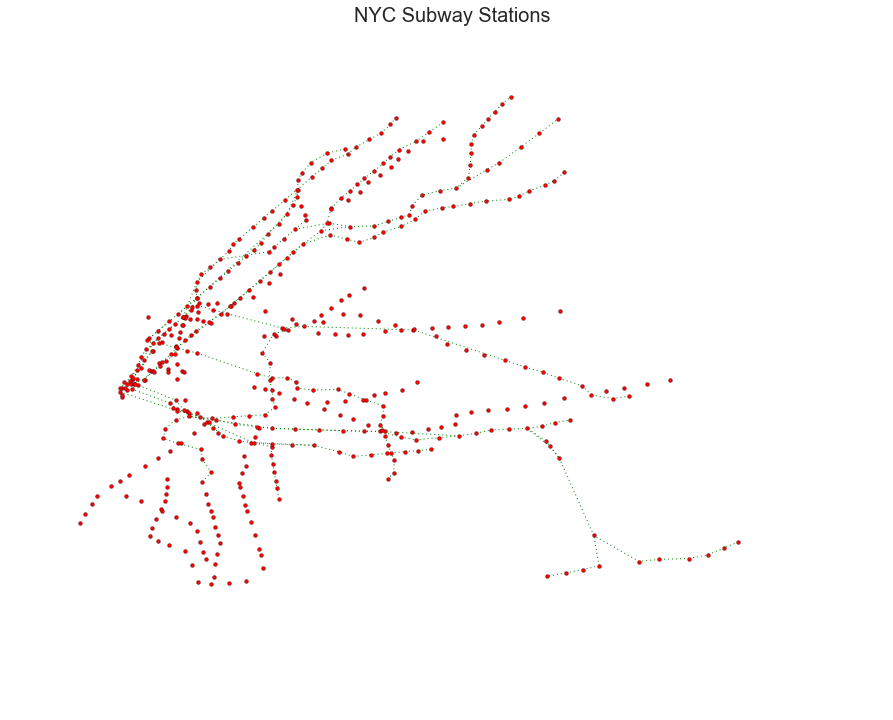

In [66]:
f, ax = pl.subplots(figsize=(15,12))
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [67]:
getclosest('D')

(41L,)
(41L, 41L)
DeKalb Ave - B-D-N-Q-R , Atlantic Av - Barclay's Center - D-N-Q-R
182nd-183rd Sts , Fordham Rd - B-D
174th-175th Sts , Tremont Ave
167th St - B-D , 170th St - B-D
Union St , Atlantic Av - Barclay's Center - D-N-Q-R
Kingsbridge Rd - B-D , Fordham Rd - B-D
42nd St - Bryant Pk , Herald Sq - 34th St - B-D-F-M
55th St , 50th St - D
W 4th St - Washington Sq (Lower) , Broadway - Lafayette St
Atlantic Av - Barclay's Center - D-N-Q-R , DeKalb Ave - B-D-N-Q-R
Tremont Ave , 174th-175th Sts
170th St - B-D , 174th-175th Sts
Fordham Rd - B-D , 182nd-183rd Sts
Bedford Park Blvd , Norwood - 205th St
Norwood - 205th St , Bedford Park Blvd
145th St - A-B-C-D , 155th St - B-D
155th St - B-D , 145th St - A-B-C-D
161st St - Yankee Stadium - B-D , 167th St - B-D
50th St - D , Ft Hamilton Pkwy - D
25th Ave , Bay Pky - D
Bay Pky - D , 20th Ave - D
79th St - D , 18th Ave - D
71st St , 79th St - D
20th Ave - D , 18th Ave - D
18th Ave - D , 20th Ave - D
62nd St , 55th St
Bay 50th St , 25th Ave


In [68]:
EdgeD=[
    ('Norwood - 205th St','Bedford Park Blvd'),
    ('Bedford Park Blvd','Kingsbridge Rd - B-D'),
    ('Kingsbridge Rd - B-D','Fordham Rd - B-D'),
    ('Fordham Rd - B-D','182nd-183rd Sts'),
    ('182nd-183rd Sts','Tremont Ave'), 
    ('Tremont Ave','174th-175th Sts'),
    ('174th-175th Sts','170th St - B-D'),
    ('170th St - B-D','167th St - B-D'),
    ('167th St - B-D','161st St - Yankee Stadium - B-D'),
    ('161st St - Yankee Stadium - B-D','155th St - B-D'),
    ('155th St - B-D','145th St - A-B-C-D'),
    ('145th St - A-B-C-D','125th St - A-B-C-D'), 
    ('125th St - A-B-C-D','59th St - Columbus Circle - A-B-C-D'),
    ('59th St - Columbus Circle - A-B-C-D','7th Ave - B-D-E'),
    ('7th Ave - B-D-E','47th-50th Sts - Rockefeller Ctr'),
    ('47th-50th Sts - Rockefeller Ctr','42nd St - Bryant Pk'),
    ('42nd St - Bryant Pk','Herald Sq - 34th St - B-D-F-M'),
    ('Herald Sq - 34th St - B-D-F-M','W 4th St - Washington Sq (Lower)'),
    ('W 4th St - Washington Sq (Lower)','Broadway - Lafayette St'),
    ('Broadway - Lafayette St','Grand St - B-D'),
    ('Grand St - B-D',"Atlantic Av - Barclay's Center - D-N-Q-R"),
    ("Atlantic Av - Barclay's Center - D-N-Q-R",'36th St - D-N-R'),
    ('36th St - D-N-R','9th Ave'),
    ('9th Ave','Ft Hamilton Pkwy - D'),
    ('Ft Hamilton Pkwy - D','50th St - D'),
    ('50th St - D','55th St'),
    ('55th St','62nd St'),
    ('62nd St','71st St'),
    ('71st St','79th St - D'),
    ('79th St - D','18th Ave - D'), 
    ('18th Ave - D','20th Ave - D'),
    ('20th Ave - D','Bay Pky - D'),
    ('Bay Pky - D','25th Ave'),
    ('25th Ave','Bay 50th St'),
    ('Bay 50th St','Coney Island - Stillwell Av'),
    ]

In [69]:
for edge in EdgeD:
    #print edge
    G.add_edge(edge[0],edge[1])

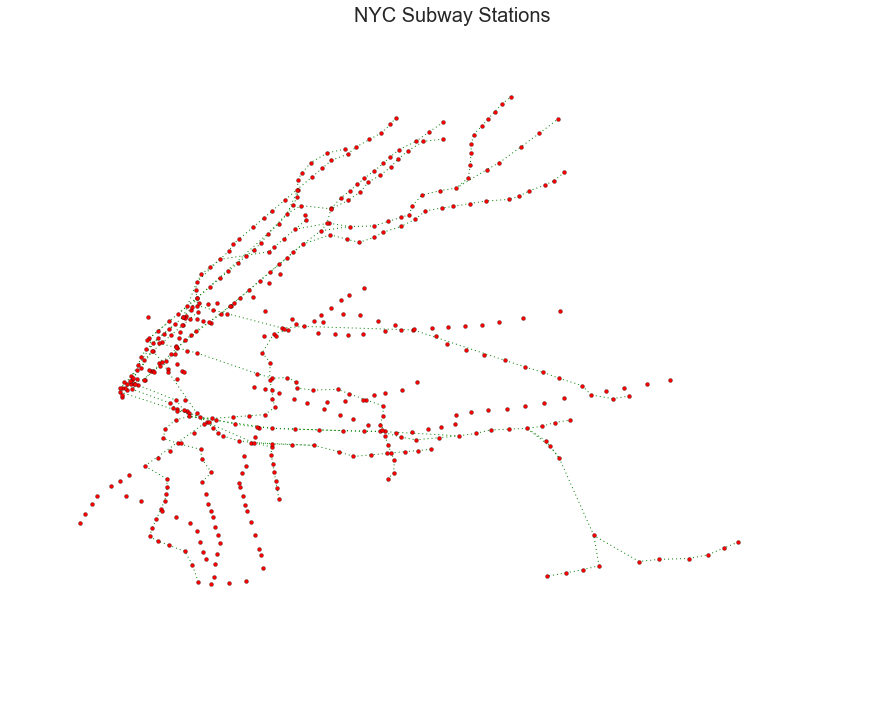

In [70]:
f, ax = pl.subplots(figsize=(15,12))
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [ ]:
RUSHhourLinks=[
    ('149th St - Grand Concourse - 4','125th St - 4-5-6-6'),###4
    ("E 180th St","3rd Ave - 149th St"),##5
    ('Nereid Ave (238 St)','233rd St'),
    ('233rd St','225th St'),
    ('225th St','219th St'),
    ('219th St','Gun Hill Rd - 2-5'),
    ('Gun Hill Rd - 2-5','Burke Ave'),
    ('Burke Ave','Allerton Ave'),
    ('Allerton Ave','Pelham Pkwy - 2-5'),
    ('Pelham Pkwy - 2-5','Bronx Park East'),
    ('Bronx Park East','E 180th St') ###5
    ('Parkchester','Hunts Point Ave'),###6
    ('Hunts Point Ave','3rd Ave - 138th St'),###6
    ('Fordham Rd - B-D','Tremont Ave'),###D
    ('Tremont Ave','145th St - A-B-C-D'),###D
    ('',''),
    ('',''),
    ('',''),
    ('',''),
    ('',''),
    ('',''),
    ('',''),
    ('',''),
    ('',''),
    ('',''),
    ('',''),
    ('',''),
    ('',''),
    ]

In [ ]:
LateNightLinks=[
    ('Grand St - B-D','DeKalb Ave - B-D-N-Q-R'),###D
    ('DeKalb Ave - B-D-N-Q-R',"Atlantic Av - Barclay's Center - D-N-Q-R"),###D
    ("Atlantic Av - Barclay's Center - D-N-Q-R",'Union St'),###D
    ('Union St','4th Av - 9th St - D-N-R'),###D
    ('4th Av - 9th St - D-N-R','Prospect Ave - D-N-R'),###D
    ('Prospect Ave - D-N-R','25th St'),###D
    ('25th St','36th St - D-N-R'),###D
    ('',''),
    ('',''),
    ('',''),
    ('',''),
    ('',''),
    ('','')
    ]
    


In [72]:
getclosest('7')

(22L,)
(22L, 22L)
Mets - Willets Point , 111th St - 7
Junction Blvd , 103rd St - Corona Plaza
Flushing - Main St , Mets - Willets Point
Woodside - 61st St , 69th St
Court Sq , Hunters Point Ave
Hunters Point Ave , Vernon Blvd - Jackson Ave
Vernon Blvd - Jackson Ave , Hunters Point Ave
Queensboro Plz , Court Sq
103rd St - Corona Plaza , Junction Blvd
111th St - 7 , 103rd St - Corona Plaza
Times Sq - 42nd St - 7-7 , 5th Ave - Bryant Pk
Grand Central - 42nd St - 7-7 , 5th Ave - Bryant Pk
69th St , 74th St - Broadway
74th St - Broadway , 69th St
52nd St , 46th St - 7
46th St - 7 , 40th St
82nd St - Jackson Hts , 90th St - Elmhurst Av
90th St - Elmhurst Av , 82nd St - Jackson Hts
33rd St - 7 , 40th St
40th St , 46th St - 7
5th Ave - Bryant Pk , Times Sq - 42nd St - 7-7
34th St - Hudson Yards , Times Sq - 42nd St - 7-7


In [73]:
Edge7=[
    ('Flushing - Main St','Mets - Willets Point'),
    ('Mets - Willets Point','111th St - 7'),
    ('111th St - 7','103rd St - Corona Plaza'),
    ('103rd St - Corona Plaza','Junction Blvd'),
    ('Junction Blvd','90th St - Elmhurst Av'),
    ('90th St - Elmhurst Av','82nd St - Jackson Hts'),
    ('82nd St - Jackson Hts','74th St - Broadway'),
    ('74th St - Broadway','69th St'),
    ('69th St','Woodside - 61st St'),
    ('Woodside - 61st St','52nd St'),
    ('52nd St','46th St - 7'),
    ('46th St - 7','40th St'),
    ('40th St','33rd St - 7'),
    ('33rd St - 7','Queensboro Plz'),
    ('Queensboro Plz','Court Sq'),
    ('Court Sq','Hunters Point Ave'),
    ('Hunters Point Ave','Vernon Blvd - Jackson Ave'),
    ('Vernon Blvd - Jackson Ave','Grand Central - 42nd St - 7-7'),
    ('Grand Central - 42nd St - 7-7','5th Ave - Bryant Pk'),
    ('5th Ave - Bryant Pk','Times Sq - 42nd St - 7-7'),
    ('Times Sq - 42nd St - 7-7','34th St - Hudson Yards')
    ]

In [74]:
for edge in Edge7:
    #print edge
    G.add_edge(edge[0],edge[1])

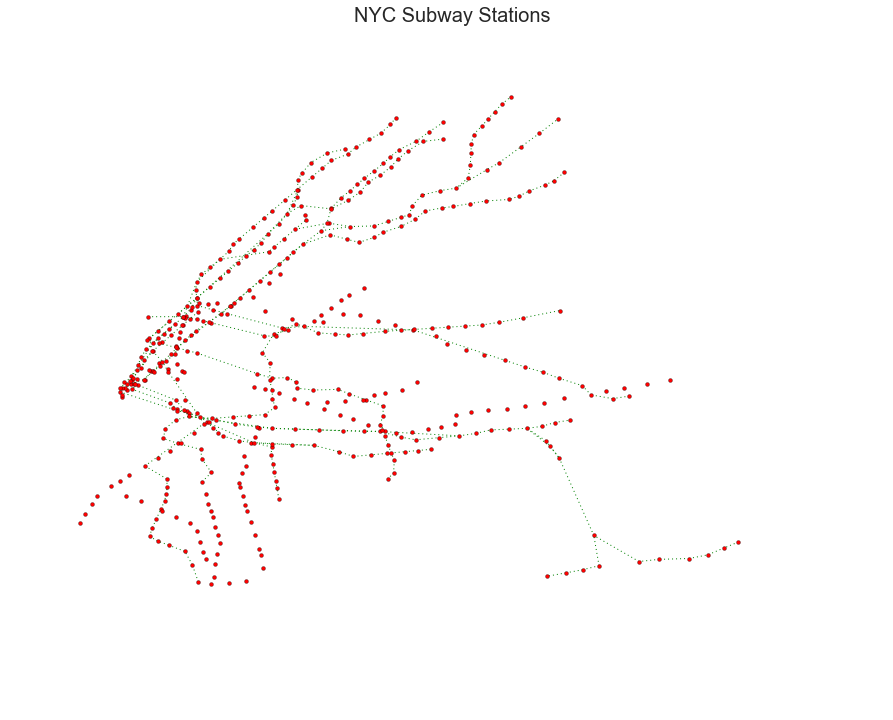

In [75]:
f, ax = pl.subplots(figsize=(15,12))
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [76]:
#Train operates in one direction (To Manhattan AM, from Manhattan PM)
Edge7Oneway=[
    ('Queensboro Plz','Woodside - 61st St'),
    ('Woodside - 61st St','Junction Blvd'),
    ('Junction Blvd','Mets - Willets Point'),
]

In [77]:
getclosest('J')

(30L,)
(30L, 30L)
Delancey St - Essex St - J-M-Z , Bowery
Van Siclen Ave - J-Z , Cleveland St
Norwood Ave , Cleveland St
104th-102nd Sts , Woodhaven Blvd
Chauncey St , Broadway Junction - J-Z
Sutphin Blvd - Archer Av , Jamaica Ctr - Parsons / Archer
Halsey St - J , Gates Ave
Lorimer St - J-M , Hewes St
Marcy Ave , Hewes St
Hewes St , Marcy Ave
85th St - Forest Pky , 75th St - Eldert Ln
Woodhaven Blvd , 104th-102nd Sts
111th St - J , 104th-102nd Sts
121st St , 111th St - J
Cleveland St , Norwood Ave
Broadway Junction - J-Z , Alabama Ave
Alabama Ave , Broadway Junction - J-Z
Crescent St , Norwood Ave
Cypress Hills , 75th St - Eldert Ln
75th St - Eldert Ln , Cypress Hills
Jamaica Ctr - Parsons / Archer , Sutphin Blvd - Archer Av
Kosciuszko St , Gates Ave
Gates Ave , Halsey St - J
Flushing Ave - J-M , Myrtle Ave
Myrtle Ave , Flushing Ave - J-M
Fulton St - J-Z , Broad St
Chambers St - J-Z , Fulton St - J-Z
Canal St - J-Z , Chambers St - J-Z
Broad St , Fulton St - J-Z
Bowery , Canal St - J-Z

In [78]:
EdgeJ=[
    ('Broad St','Fulton St - J-Z'),
    ('Fulton St - J-Z','Chambers St - J-Z'),
    ('Chambers St - J-Z','Canal St - J-Z'),
    ('Canal St - J-Z','Bowery'),
    ('Bowery','Delancey St - Essex St - J-M-Z'),
    ('Delancey St - Essex St - J-M-Z','Marcy Ave'), 
    ('Marcy Ave','Hewes St'),
    ('Hewes St','Lorimer St - J-M'),
    ('Lorimer St - J-M','Flushing Ave - J-M'),
    ('Flushing Ave - J-M','Myrtle Ave'),
    ('Myrtle Ave','Kosciuszko St'),
    ('Kosciuszko St','Gates Ave'),
    ('Gates Ave','Halsey St - J'),
    ('Halsey St - J','Broadway Junction - J-Z'),
    ('Broadway Junction - J-Z','Alabama Ave'),
    ('Alabama Ave','Van Siclen Ave - J-Z'),
    ('Van Siclen Ave - J-Z','Cleveland St'),
    ('Cleveland St','Norwood Ave'),
    ('Norwood Ave','Crescent St'),
    ('Crescent St','Cypress Hills'),
    ('Cypress Hills','75th St - Eldert Ln'),
    ('75th St - Eldert Ln','85th St - Forest Pky'),
    ('85th St - Forest Pky','Woodhaven Blvd'),
    ('Woodhaven Blvd','104th-102nd Sts'),
    ('104th-102nd Sts','111th St - J'),
    ('111th St - J','121st St'),
    ('121st St','Sutphin Blvd - Archer Av'),
    ('Sutphin Blvd - Archer Av','Jamaica Ctr - Parsons / Archer')
    ]

In [79]:
for edge in EdgeJ:
    #print edge
    G.add_edge(edge[0],edge[1])

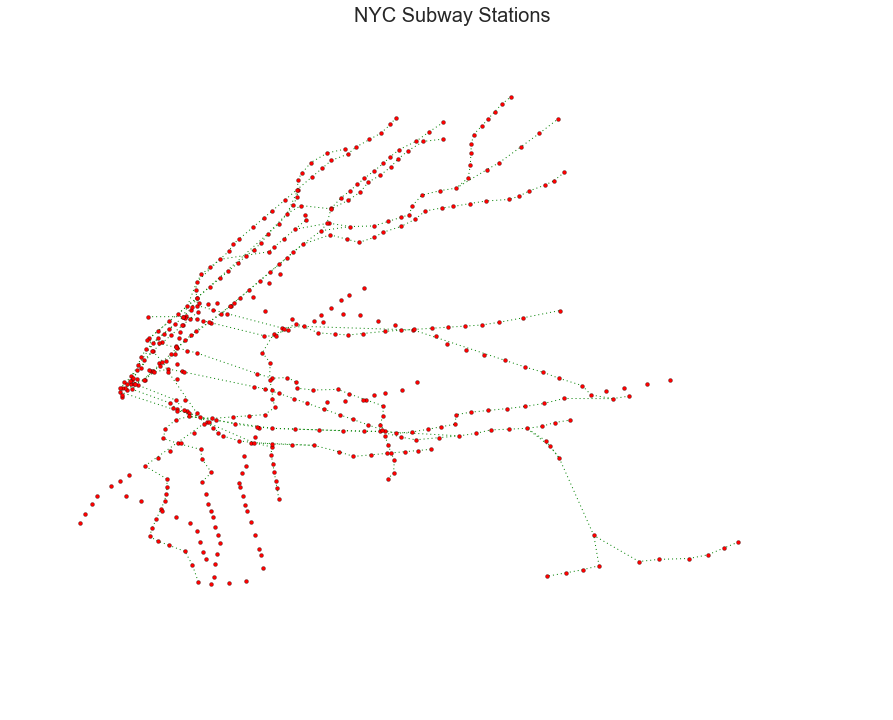

In [80]:
f, ax = pl.subplots(figsize=(15,12))
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [81]:
getclosest('M')

(36L,)
(36L, 36L)
65th St , Northern Blvd
36th St - E-M-R , Queens Plz
Delancey St - Essex St - J-M-Z , Broadway - Lafayette St
Elmhurst Ave , Grand Ave - Newtown
42nd St - Bryant Pk , Herald Sq - 34th St - B-D-F-M
Court Sq - 23rd St , Queens Plz
67th Ave , 63rd Dr - Rego Park
Grand Ave - Newtown , Elmhurst Ave
Lorimer St - J-M , Hewes St
W 4th St - Washington Sq (Lower) , 14th St - F-M
Marcy Ave , Hewes St
Hewes St , Marcy Ave
5th Ave - 53rd St , 47th-50th Sts - Rockefeller Ctr
Lexington Ave - 53rd St , 5th Ave - 53rd St
63rd Dr - Rego Park , Woodhaven Blvd - Queens Mall
Woodhaven Blvd - Queens Mall , 63rd Dr - Rego Park
Myrtle - Wyckoff Aves - M , Seneca Ave
Seneca Ave , Forest Ave
46th St - E-M-R , Steinway St
Northern Blvd , 65th St
Forest Hills - 71st Av , 67th Ave
Steinway St , 46th St - E-M-R
Central Ave , Knickerbocker Ave
Knickerbocker Ave , Central Ave
Queens Plz , 36th St - E-M-R
47th-50th Sts - Rockefeller Ctr , 42nd St - Bryant Pk
23rd St - F-M , 14th St - F-M
Herald Sq - 

In [82]:
EdgeM=[
    ('Middle Village - Metropolitan Ave','Fresh Pond Rd'),
    ('Fresh Pond Rd','Forest Ave'),
    ('Forest Ave','Seneca Ave'),
    ('Seneca Ave','Myrtle - Wyckoff Aves - M'),
    ('Myrtle - Wyckoff Aves - M','Knickerbocker Ave'),
    ('Knickerbocker Ave','Central Ave'),
    ('Central Ave','Myrtle Ave'),  
    ('Myrtle Ave','Flushing Ave - J-M'),
    ('Flushing Ave - J-M','Lorimer St - J-M'),  
    ('Lorimer St - J-M','Hewes St'),
    ('Hewes St','Marcy Ave'),
    ('Marcy Ave','Delancey St - Essex St - J-M-Z')
    ]

In [83]:
for edge in EdgeM:
    #print edge
    G.add_edge(edge[0],edge[1])

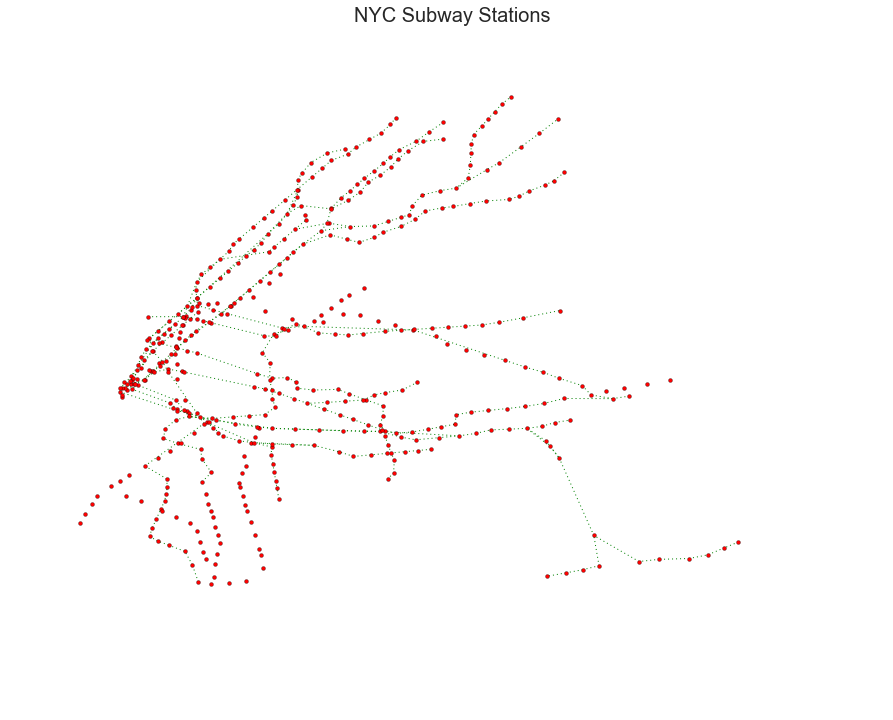

In [84]:
f, ax = pl.subplots(figsize=(15,12))
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [85]:
EdgeMweekdays=[
    ('Delancey St - Essex St - J-M-Z','Broadway - Lafayette St'),
    ('Broadway - Lafayette St','W 4th St - Washington Sq (Lower)'),
    ('W 4th St - Washington Sq (Lower)','14th St - F-M'),
    ('14th St - F-M','23rd St - F-M'),
    ('23rd St - F-M','Herald Sq - 34th St - B-D-F-M'), 
    ('Herald Sq - 34th St - B-D-F-M','42nd St - Bryant Pk'),
    ('42nd St - Bryant Pk','47th-50th Sts - Rockefeller Ctr'),
    ('47th-50th Sts - Rockefeller Ctr','5th Ave - 53rd St'),
    ('5th Ave - 53rd St','Lexington Ave - 53rd St'),
    ('Lexington Ave - 53rd St','Court Sq - 23rd St'),
    ('Court Sq - 23rd St','Queens Plz'),
    ('Queens Plz','36th St - E-M-R'),
    ('36th St - E-M-R','Steinway St'),
    ('Steinway St','46th St - E-M-R'),
    ('46th St - E-M-R','Northern Blvd'),
    ('Northern Blvd','65th St'),
    ('65th St','Jackson Hts - Roosevelt Av'),
    ('Jackson Hts - Roosevelt Av','Elmhurst Ave'),
    ('Elmhurst Ave','Grand Ave - Newtown'),
    ('Grand Ave - Newtown','Woodhaven Blvd - Queens Mall'),
    ('Woodhaven Blvd - Queens Mall','63rd Dr - Rego Park'),
    ('63rd Dr - Rego Park','67th Ave'),
    ('67th Ave','Forest Hills - 71st Av')
    ]


In [86]:
for edge in EdgeMweekdays:
    #print edge
    G.add_edge(edge[0],edge[1])

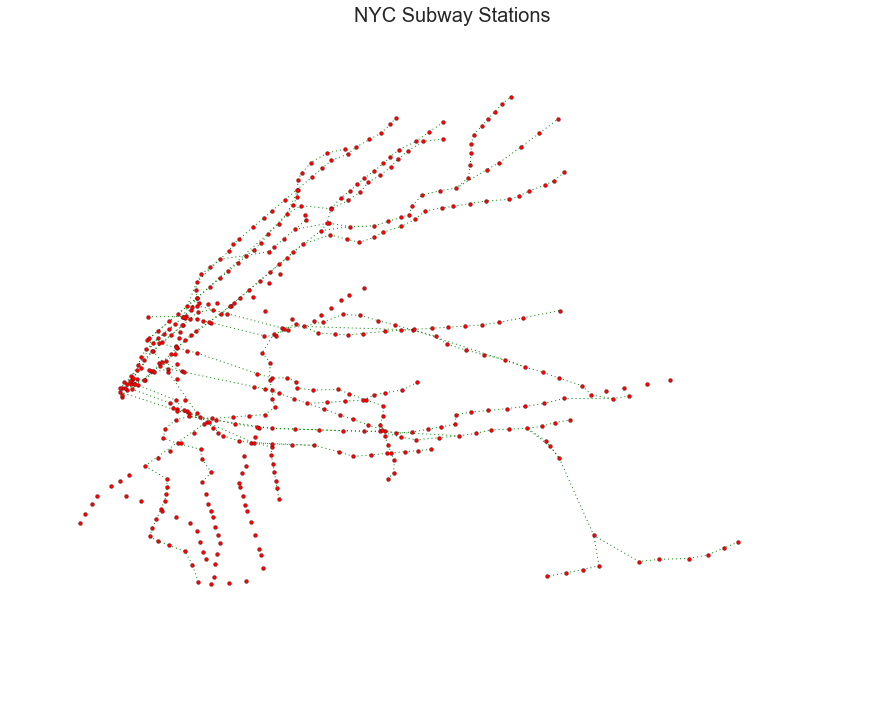

In [87]:
f, ax = pl.subplots(figsize=(15,12))
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [88]:
getclosest('R')

(45L,)
(45L, 45L)
65th St , Northern Blvd
36th St - E-M-R , Queens Plz
DeKalb Ave - B-D-N-Q-R , Jay St - MetroTech - N-R
Union St , Atlantic Av - Barclay's Center - D-N-Q-R
Elmhurst Ave , Grand Ave - Newtown
67th Ave , 63rd Dr - Rego Park
Grand Ave - Newtown , Elmhurst Ave
Times Sq - 42nd St - N-Q-R-W , Herald Sq - 34th St - N-Q-R-W
Atlantic Av - Barclay's Center - D-N-Q-R , DeKalb Ave - B-D-N-Q-R
28th St - N-Q-R-W , 23rd St - N-Q-R-W
Herald Sq - 34th St - N-Q-R-W , 28th St - N-Q-R-W
63rd Dr - Rego Park , Woodhaven Blvd - Queens Mall
Woodhaven Blvd - Queens Mall , 63rd Dr - Rego Park
46th St - E-M-R , Steinway St
Northern Blvd , 65th St
Forest Hills - 71st Av , 67th Ave
Steinway St , 46th St - E-M-R
Queens Plz , 36th St - E-M-R
77th St - R , Bay Ridge Ave
Bay Ridge Ave , 77th St - R
Bay Ridge - 95th St , 86th St - R
86th St - R , Bay Ridge - 95th St
49th St , Times Sq - 42nd St - N-Q-R-W
57th St - N-Q-R-W , 49th St
5th Ave - 59th St , Lexington Ave - 59th St - N-R-W
Lexington Ave - 59t

In [95]:
EdgeR=[
    ('Bay Ridge - 95th St','86th St - R'), 
    ('86th St - R','77th St - R'),
    ('77th St - R','Bay Ridge Ave'),
    ('Bay Ridge Ave','59th St'),
    ('59th St','53rd St'),
    ('53rd St','45th St'),
    ('45th St','36th St - D-N-R'),
    ('36th St - D-N-R','25th St'),
    ('25th St','Prospect Ave - D-N-R'),
    ('Prospect Ave - D-N-R','4th Av - 9th St - D-N-R'),
    ('4th Av - 9th St - D-N-R','Union St'),
    ('Union St',"Atlantic Av - Barclay's Center - D-N-Q-R"),
    ("Atlantic Av - Barclay's Center - D-N-Q-R",'DeKalb Ave - B-D-N-Q-R'),
    ('DeKalb Ave - B-D-N-Q-R','Jay St - MetroTech - N-R'),
    ('Jay St - MetroTech - N-R','Court St'),
    ('Court St','Whitehall St'),
    ('Whitehall St','Rector St - R-W'),
    ('Rector St - R-W','Cortlandt St - R-W'),
    ('Cortlandt St - R-W','City Hall'),
    ('City Hall','Canal St - R-W'),
    ('Canal St - R-W','Prince St'),
    ('Prince St','8th St - NYU'),
    ('8th St - NYU','Union Sq - 14th St - N-Q-R-W'),
    ('Union Sq - 14th St - N-Q-R-W','23rd St - N-Q-R-W'),
    ('23rd St - N-Q-R-W','28th St - N-Q-R-W'),
    ('28th St - N-Q-R-W','Herald Sq - 34th St - N-Q-R-W'),
    ('Herald Sq - 34th St - N-Q-R-W','Times Sq - 42nd St - N-Q-R-W'),
    ('Times Sq - 42nd St - N-Q-R-W','49th St'),
    ('49th St','57th St - N-Q-R-W'),
    ('57th St - N-Q-R-W','5th Ave - 59th St'),
    ('5th Ave - 59th St','Lexington Ave - 59th St - N-R-W'),
    ('Lexington Ave - 59th St - N-R-W','Queens Plz'),
    ('Queens Plz','36th St - E-M-R'),
    ('36th St - E-M-R','Steinway St'),
    ('Steinway St','46th St - E-M-R'),
    ('46th St - E-M-R','Northern Blvd'), 
    ('Northern Blvd','65th St'),
    ('65th St','Jackson Hts - Roosevelt Av'),
    ('Jackson Hts - Roosevelt Av','Elmhurst Ave'),
    ('Elmhurst Ave','Grand Ave - Newtown'),
    ('Grand Ave - Newtown','Woodhaven Blvd - Queens Mall'),
    ('Woodhaven Blvd - Queens Mall','63rd Dr - Rego Park'),
    ('63rd Dr - Rego Park','67th Ave'),
    ('67th Ave','Forest Hills - 71st Av')
    ]

In [96]:
for edge in EdgeR:
    #print edge
    G.add_edge(edge[0],edge[1])

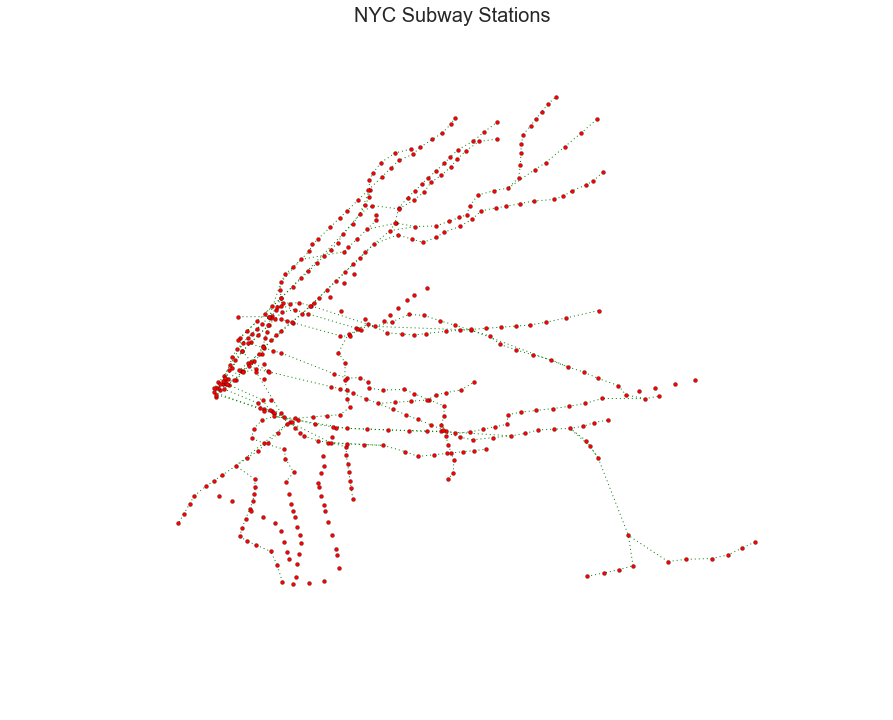

In [97]:
f, ax = pl.subplots(figsize=(15,12))
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [98]:
getclosest('Q')

(35L,)
(35L, 35L)
DeKalb Ave - B-D-N-Q-R , Atlantic Av - Barclay's Center - D-N-Q-R
Prospect Park , Parkside Ave
Times Sq - 42nd St - N-Q-R-W , Herald Sq - 34th St - N-Q-R-W
Ocean Pkwy , Brighton Beach
Beverly Rd - Q , Cortelyou Rd
Church Ave - B-Q , Parkside Ave
Newkirk Ave - B-Q , Cortelyou Rd
Parkside Ave , Church Ave - B-Q
7th Ave - B-Q , Atlantic Av - Barclay's Center - B-Q
Atlantic Av - Barclay's Center - B-Q , Atlantic Av - Barclay's Center - D-N-Q-R
Atlantic Av - Barclay's Center - D-N-Q-R , Atlantic Av - Barclay's Center - B-Q
28th St - N-Q-R-W , 23rd St - N-Q-R-W
Herald Sq - 34th St - N-Q-R-W , 28th St - N-Q-R-W
W 8th St - NY Aquarium , Coney Island - Stillwell Av
Brighton Beach , Ocean Pkwy
Sheepshead Bay , Neck Rd
Ave U - Q , Neck Rd
Kings Hwy - B-Q , Ave M
Ave M , Ave J
Ave J , Ave H
Ave H , Ave J
Neck Rd , Ave U - Q
Lexington Ave - 63rd St , 72nd St - Q
49th St , Times Sq - 42nd St - N-Q-R-W
57th St - N-Q-R-W , 49th St
Union Sq - 14th St - N-Q-R-W , 23rd St - N-Q-R-W
23rd

In [102]:
EdgeQ=[
    ('96th St - Q','86th St - Q'),
    ('86th St - Q','72nd St - Q'),
    ('72nd St - Q','Lexington Ave - 63rd St'),
    ('Lexington Ave - 63rd St','57th St - N-Q-R-W'),
    ('57th St - N-Q-R-W','Times Sq - 42nd St - N-Q-R-W'),
    ('Times Sq - 42nd St - N-Q-R-W','Herald Sq - 34th St - N-Q-R-W'),
    ('Herald Sq - 34th St - N-Q-R-W','Union Sq - 14th St - N-Q-R-W'),
    ('Union Sq - 14th St - N-Q-R-W','Canal St - N-Q'), 
    ('Canal St - N-Q','DeKalb Ave - B-D-N-Q-R'),
    ('DeKalb Ave - B-D-N-Q-R',"Atlantic Av - Barclay's Center - D-N-Q-R"),
    ("Atlantic Av - Barclay's Center - D-N-Q-R",'7th Ave - B-Q'),
    ('7th Ave - B-Q','Prospect Park'),
    ('Prospect Park','Parkside Ave'),
    ('Parkside Ave','Church Ave - B-Q'),
    ('Church Ave - B-Q','Beverly Rd - Q'),
    ('Beverly Rd - Q','Cortelyou Rd'),
    ('Cortelyou Rd','Newkirk Ave - B-Q'),
    ('Newkirk Ave - B-Q','Ave H'),
    ('Ave H','Ave J'),
    ('Ave J','Ave M'),  
    ('Ave M','Kings Hwy - B-Q'),
    ('Kings Hwy - B-Q','Ave U - Q'),
    ('Ave U - Q','Neck Rd'),
    ('Neck Rd','Sheepshead Bay'),
    ('Sheepshead Bay','Brighton Beach'), 
    ('Brighton Beach','Ocean Pkwy'),
    ('Ocean Pkwy','W 8th St - NY Aquarium'),
    ('W 8th St - NY Aquarium','Coney Island - Stillwell Av')
    ]

In [103]:
EdgeQlate=[
    ('Prince St','Canal St - N-Q'),
    ('Prince St','8th St - NYU'),
    ("8th St - NYU","Union Sq - 14th St - N-Q-R-W"),
    ("Union Sq - 14th St - N-Q-R-W","23rd St - N-Q-R-W"),
    ("23rd St - N-Q-R-W","28th St - N-Q-R-W"),
    ("28th St - N-Q-R-W","Herald Sq - 34th St - N-Q-R-W"),
    ('57th St - N-Q-R-W','49th St'),
    ("49th St","Times Sq - 42nd St - N-Q-R-W")
    ]

In [104]:
for edge in EdgeQ:
    #print edge
    G.add_edge(edge[0],edge[1])

In [105]:
for edge in EdgeQlate:
    #print edge
    G.add_edge(edge[0],edge[1])

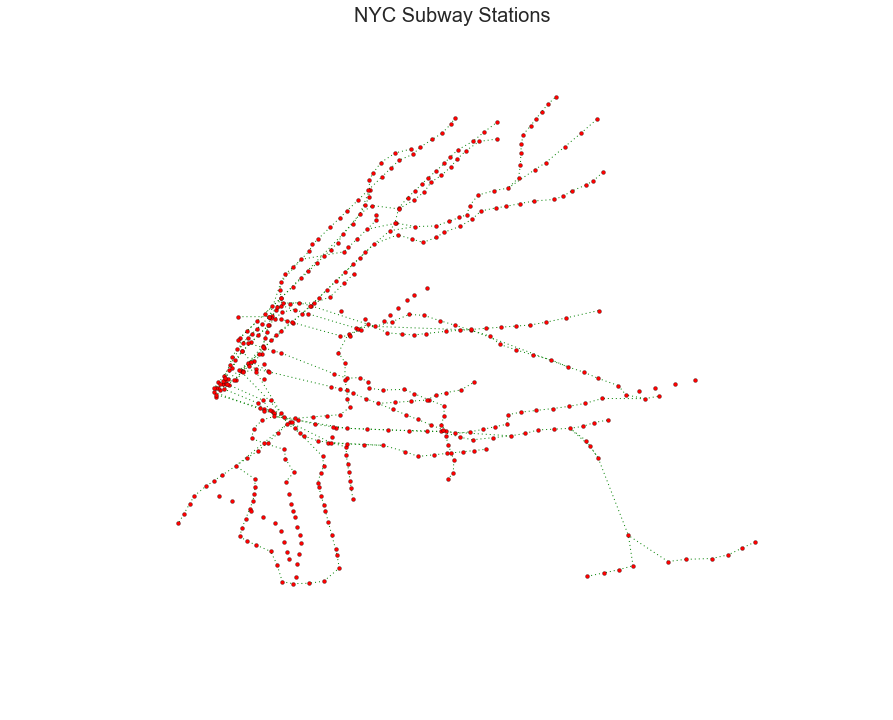

In [106]:
f, ax = pl.subplots(figsize=(15,12))
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [107]:
getclosest('N')

(41L,)
(41L, 41L)
DeKalb Ave - B-D-N-Q-R , Jay St - MetroTech - N-R
Union St , Atlantic Av - Barclay's Center - D-N-Q-R
8th Ave - N , Ft Hamilton Pkwy - N
36th Ave , 39th Ave
Broadway - N-W , 36th Ave
Times Sq - 42nd St - N-Q-R-W , Herald Sq - 34th St - N-Q-R-W
Queensboro Plz , 39th Ave
Atlantic Av - Barclay's Center - D-N-Q-R , DeKalb Ave - B-D-N-Q-R
28th St - N-Q-R-W , 23rd St - N-Q-R-W
Herald Sq - 34th St - N-Q-R-W , 28th St - N-Q-R-W
39th Ave , 36th Ave
Astoria Blvd , 30th Ave
Astoria - Ditmars Blvd , Astoria Blvd
30th Ave , Astoria Blvd
Ft Hamilton Pkwy - N , 8th Ave - N
20th Ave - N , Bay Pky - N
18th Ave - N , 20th Ave - N
New Utrecht Ave , 18th Ave - N
Ave U - N , Gravesend - 86th St
Kings Hwy - N , Ave U - N
Gravesend - 86th St , Ave U - N
Bay Pky - N , 20th Ave - N
49th St , Times Sq - 42nd St - N-Q-R-W
57th St - N-Q-R-W , 49th St
5th Ave - 59th St , Lexington Ave - 59th St - N-R-W
Lexington Ave - 59th St - N-R-W , 5th Ave - 59th St
Jay St - MetroTech - N-R , DeKalb Ave - B-D

In [108]:
EdgeN=[
    ("Coney Island - Stillwell Av","Gravesend - 86th St"),
    ("Gravesend - 86th St","Ave U - N"),
    ("Ave U - N","Kings Hwy - N"),
    ("Kings Hwy - N","Bay Pky - N"),
    ("Bay Pky - N","20th Ave - N"),
    ("20th Ave - N","18th Ave - N"),
    ("18th Ave - N","New Utrecht Ave"),
    ("New Utrecht Ave","Ft Hamilton Pkwy - N"),
    ("Ft Hamilton Pkwy - N","8th Ave - N"),
    ("8th Ave - N","59th St"),
    ("59th St","36th St - D-N-R"),
    ("36th St - D-N-R","Atlantic Av - Barclay's Center - D-N-Q-R"),
    ("Atlantic Av - Barclay's Center - D-N-Q-R","Canal St - N-Q")
    ("Canal St - N-Q","Union Sq - 14th St - N-Q-R-W"),
    ("Union Sq - 14th St - N-Q-R-W","Herald Sq - 34th St - N-Q-R-W"),
    ("Herald Sq - 34th St - N-Q-R-W","Times Sq - 42nd St - N-Q-R-W"),
    ("Times Sq - 42nd St - N-Q-R-W","49th St"),
    ("49th St","57th St - N-Q-R-W"),
    ("57th St - N-Q-R-W","5th Ave - 59th St"),
    ("5th Ave - 59th St","Lexington Ave - 59th St - N-R-W"), 
    ("Lexington Ave - 59th St - N-R-W","Queensboro Plz"),
    ("Queensboro Plz","39th Ave"),
    ("39th Ave","36th Ave"), 
    ("36th Ave","Broadway - N-W"),
    ("Broadway - N-W","30th Ave"), 
    ("30th Ave","Astoria Blvd"),
    ("Astoria Blvd","Astoria - Ditmars Blvd")
    ]

In [109]:
for edge in EdgeN:
    #print edge
    G.add_edge(edge[0],edge[1])

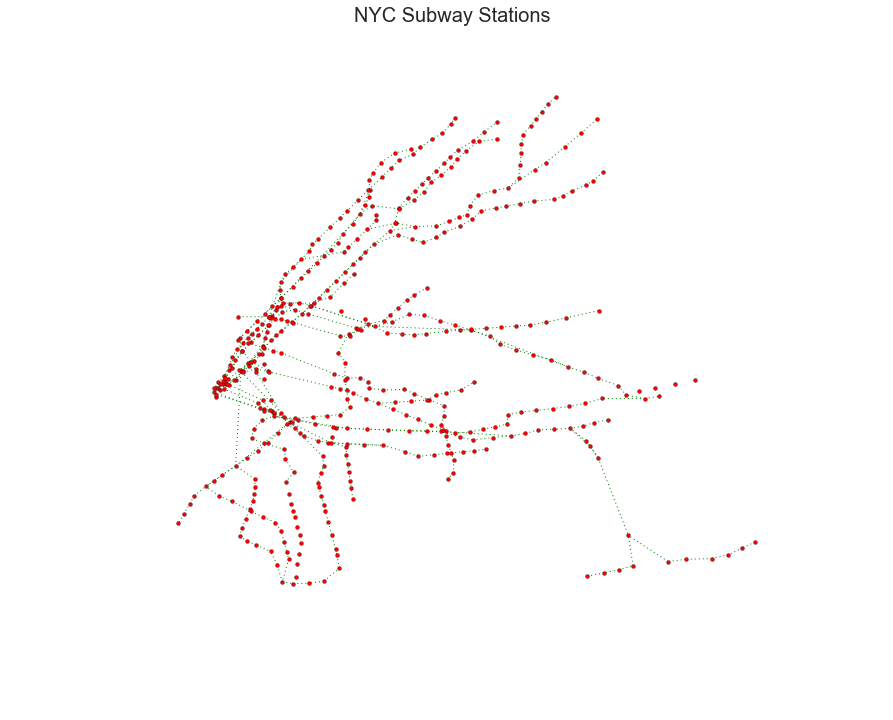

In [110]:
f, ax = pl.subplots(figsize=(15,12))
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [ ]:
EdgeRlatenight=[
    ('57th St - N-Q-R-W','49th St'),##latenight
    ('49th St','Times Sq - 42nd St - N-Q-R-W'),##latenight
    ]

In [120]:
getclosest('F')

(45L,)
(45L, 45L)
42nd St - Bryant Pk , Herald Sq - 34th St - B-D-F-M
Kew Gardens - Union Tpke , 75th Ave
Ditmas Ave , 18th Ave - F
W 4th St - Washington Sq (Lower) , 14th St - F-M
15th St - Prospect Park , 7th Ave - F-G
7th Ave - F-G , 15th St - Prospect Park
Ft Hamilton Pkwy - F-G , Church Ave - F-G
Church Ave - F-G , Ft Hamilton Pkwy - F-G
75th Ave , Kew Gardens - Union Tpke
Parsons Blvd , Sutphin Blvd
169th St , Jamaica - 179th St
W 8th St - NY Aquarium , Neptune Ave
Briarwood - Van Wyck Blvd , Sutphin Blvd
Forest Hills - 71st Av , 75th Ave
Sutphin Blvd , Parsons Blvd
Jamaica - 179th St , 169th St
18th Ave - F , Ave I
Ave U - F , Ave X
Kings Hwy - F , Ave P
Neptune Ave , W 8th St - NY Aquarium
Ave X , Ave U - F
Ave P , Ave N
Ave N , Ave P
Bay Pky - F , Ave I
Ave I , Bay Pky - F
21st St - Queensbridge , Roosevelt Island - Main St
47th-50th Sts - Rockefeller Ctr , 42nd St - Bryant Pk
57th St - F , 47th-50th Sts - Rockefeller Ctr
Lexington Ave - 63rd St , 57th St - F
Roosevelt Island 

In [122]:
EdgeF=[
    ("Jamaica - 179th St","169th St"),
    ("169th St","Parsons Blvd"),
    ("Parsons Blvd","Sutphin Blvd"),
    ("Sutphin Blvd","Briarwood - Van Wyck Blvd"),
    ("Briarwood - Van Wyck Blvd","Kew Gardens - Union Tpke"),
    ("Kew Gardens - Union Tpke","75th Ave"),
    ("75th Ave","Forest Hills - 71st Av"),
    ("Forest Hills - 71st Av","Jackson Hts - Roosevelt Av"),
    ("Jackson Hts - Roosevelt Av","21st St - Queensbridge"),
    ("21st St - Queensbridge","Roosevelt Island - Main St"),
    ("Roosevelt Island - Main St","Lexington Ave - 63rd St"),
    ("Lexington Ave - 63rd St","57th St - F"),
    ("57th St - F","47th-50th Sts - Rockefeller Ctr"),
    ("47th-50th Sts - Rockefeller Ctr","42nd St - Bryant Pk"),
    ("42nd St - Bryant Pk","Herald Sq - 34th St - B-D-F-M"),
    ("Herald Sq - 34th St - B-D-F-M","23rd St - F-M"),
    ("23rd St - F-M","14th St - F-M"),
    ("14th St - F-M","W 4th St - Washington Sq (Lower)"),
    ("W 4th St - Washington Sq (Lower)","Broadway - Lafayette St"),
    ("Broadway - Lafayette St","Lower East Side - 2nd Ave"),
    ("Lower East Side - 2nd Ave","Delancey St - Essex St - F"),
    ("Delancey St - Essex St - F","East Broadway"),
    ("East Broadway","York St"),
    ("York St","Jay St - MetroTech - A-C-F"),
    ("Jay St - MetroTech - A-C-F","Bergen St - F-G"),
    ("Bergen St - F-G","Carroll St"),
    ("Carroll St","Smith - 9th Sts"),
    ("Smith - 9th Sts","4th Av - 9th St - F-G"),
    ("4th Av - 9th St - F-G","7th Ave - F-G"),
    ("7th Ave - F-G","15th St - Prospect Park"),
    ("15th St - Prospect Park","Ft Hamilton Pkwy - F-G"),
    ("Ft Hamilton Pkwy - F-G","Church Ave - F-G"),
    ("Church Ave - F-G","Ditmas Ave"),
    ("Ditmas Ave","18th Ave - F"),
    ("18th Ave - F","Ave I"),
    ("Ave I","Bay Pky - F"),
    ("Bay Pky - F","Ave N"),
    ("Ave N","Ave P"),
    ("Ave P","Kings Hwy - F"),
    ("Kings Hwy - F","Ave U - F"), 
    ("Ave U - F","Ave X"),
    ("Ave X","Neptune Ave"),
    ("Neptune Ave","W 8th St - NY Aquarium"),
    ('W 8th St - NY Aquarium','Coney Island - Stillwell Av')
    ]


In [123]:
for edge in EdgeF:
    #print edge
    G.add_edge(edge[0],edge[1])

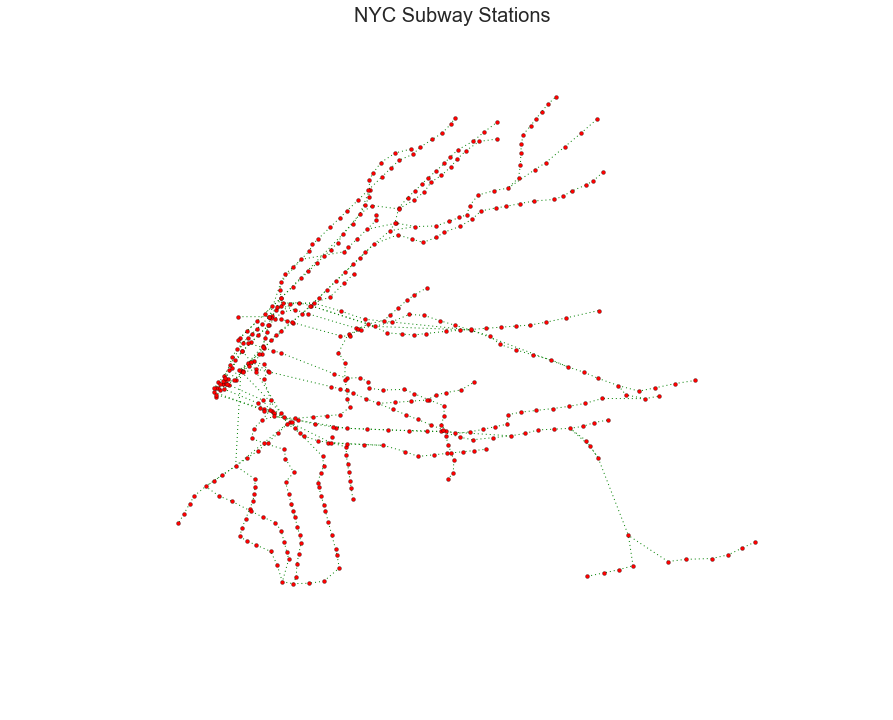

In [124]:
f, ax = pl.subplots(figsize=(15,12))
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [ ]:
LinesList = [
    'G',
    "N",
    
    ]

subline['color']='NONE'
subline['color'][subline['name']=='G'] = 'greenyellow'
subline['color'][subline['name']=='N'] = 'y'
subline['color'][subline['name']=='R'] = 'y'
subline['color'][subline['name']=='N-Q-R'] = 'y'
subline['color'][subline['name']=='N-Q-R-W'] = 'y'
subline['color'][subline['name']=='N-R-W'] = 'y'
subline['color'][subline['name']=='N-Q'] = 'y'
subline['color'][subline['name']=='N-R'] = 'y'
subline['color'][subline['name']=='N-W'] = 'y'
subline['color'][subline['name']=='R-W'] = 'y'
subline['color'][subline['name']=='Q'] = 'y'
subline['color'][subline['name']=='B'] = 'orange'
subline['color'][subline['name']=='M'] = 'orange'
subline['color'][subline['name']=='B-D'] = 'orange'
subline['color'][subline['name']=='B-D-F-M'] = 'orange'
subline['color'][subline['name']=='F-M'] = 'orange'
subline['color'][subline['name']=='F'] = 'orange'
subline['color'][subline['name']=='D'] = 'orange'
subline['color'][subline['name']=='A'] = 'blue'
subline['color'][subline['name']=='C'] = 'blue'
subline['color'][subline['name']=='A-C'] = 'blue'
subline['color'][subline['name']=='A-C-E'] = 'blue'
subline['color'][subline['name']=='E'] = 'blue'
subline['color'][subline['name']=='S'] = 'dimgrey'
subline['color'][subline['name']=='7'] = 'm'
subline['color'][subline['name']=='1-2-3'] = 'r'
subline['color'][subline['name']=='2-3'] = 'r'
subline['color'][subline['name']=='2'] = 'r'
subline['color'][subline['name']=='1'] = 'r'
subline['color'][subline['name']=='3'] = 'r'
subline['color'][subline['name']=='J-Z'] = 'saddlebrown'
subline['color'][subline['name']=='L'] = 'darkgrey'
subline['color'][subline['name']=='4-5-6'] = 'green'
subline['color'][subline['name']=='4-5'] = 'green'
subline['color'][subline['name']=='5'] = 'green'
subline['color'][subline['name']=='6'] = 'green'
subline['color'][subline['name']=='4'] = 'green'

In [111]:
nx.average_shortest_path_length(G)

NetworkXError: Graph is not connected.

In [119]:
len(nx.closeness_centrality(G, u=None, distance=None))

473

In [147]:
sum(list(zip(*nx.single_source_shortest_path_length(G,'Ave X').items())[1]))/len(list(zip(*nx.single_source_shortest_path_length(G,'Ave X').items())[1]))

21

In [148]:
len(G.node)

473

In [151]:
len(nx.single_source_shortest_path_length(G,'Ave X').items())

288

In [127]:
for node in G.node:
    print nx.single_source_shortest_path_length(G,node)

{'77th St - 4-6-6': 1, u'86th St - 4-5-6-6': 0, '33rd St - 4-6-6': 3, '149th St - Grand Concourse - 4': 3, 'Bedford Park Blvd - Lehman College': 13, 'Park Pl - 2-3': 15, 'New Lots Ave - 3-4': 19, 'Zerega Ave': 15, 'Dyckman St - 1': 20, 'Newkirk Ave - 2-5': 17, '116th St - Columbia University': 12, 'Van Cortlandt Park - 242nd St': 25, 'Borough Hall - 2-3': 11, '59th St - Columbus Circle - 1-2': 12, 'Burke Ave': 15, "Atlantic Av - Barclay's Center - 2-3-4-5": 10, 'E 149th St': 6, 'Grand Army Plaza': 12, '145th St - 1': 15, '145th St - 3': 6, 'Mosholu Pkwy': 14, 'Gun Hill Rd - 2-5': 16, '110th St': 3, 'Central Park North (110th St)': 8, 'Middletown Rd': 17, 'Freeman St': 8, '225th St': 18, '191st St': 19, 'Longwood Ave': 7, 'Gun Hill Rd - 5': 14, '135th St - 2-3': 5, 'President St': 12, 'Nevins St': 9, 'Burnside Ave': 9, '125th St - 4-5-6-6': 1, 'Kingston Ave': 13, 'Kingsbridge Rd - 4': 12, '138th St - Grand Concourse': 2, 'Simpson St': 7, 'Bowling Green': 7, 'Hoyt St': 10, 'Crown Hts - U